<div style="text-align: center;">
      « ✦ —⋆——― ꒰ঌ·✦·໒꒱ ———⋆— ✦ »
</div>

 
<div style="text-align: center;">
<h1>Projeto final de Machine Learning</h1>
<h3> TRIO EPISTASIA - Bruna Guedes, Laura Medeiros e Mariana Melo</h2>
</div>
 

<div style="text-align: center;">
      « ✦ —⋆——― ꒰ঌ·✦·໒꒱ ———⋆— ✦ »
</div>

# Sumário

1. Introdução
2. Revisão teórica
   - Instanciação de modelos
   - Divisão de dados: treino e teste
   - Parâmetros e hiperparâmetros
   - Viés e Variância
   - Overfitting e Underfitting
   - Validação cruzada
   - Importância de ferramentas explicativas de modelos: SHAP e LIME
   - Dataset Glioma Grading Clinical and Mutation Features
3. Metodologia
4. Desenvolvimento
   - Importação das bibliotecas
   - Pré-processamento
     - Obtenção dos dados
     - Tipos dos dados
     - Escolha do target e das features
     - Separação de dados de treino e teste
   - Modelo Baseline
   - Instanciação dos modelos
     - RandomForestClassifier
     - XGBoostClassifier
     - SupportVectorClassification (SVC)
     - Bernoulli NaiveBayes (NB)
     - ExtraTreesClassifier
   - Investigação dos conjuntos de hiperparâmetros com Optuna
     - RandomForestClassifier
     - XGBoostClassifier
     - SupportVectorClassification (SVC)
     - Bernoulli NaiveBayes (NB)
     - ExtraTreesClassifier
   - Comparação dos algoritmos usando validação cruzada
   - Uso de ferramentas explicativas: SHAP
     - RandomForestClassifier
     - XGBoostClassifier
     - SupportVectorClassification (SVC)
     - Bernoulli NaiveBayes (NB)
     - ExtraTreesClassifier
    - Uso de ferramentas explicativas: LIME
         - RandomForestClassifier
         - XGBoostClassifier
         - SupportVectorClassification (SVC)
         - Bernoulli NaiveBayes (NB)
         - ExtraTreesClassifier
5. Resultados e discussões
6. Conclusão

# 1. Introdução

Nos últimos anos, a aplicação de técnicas de Ciência de Dados e Aprendizado de Máquina (Machine Learning, ML) tem se consolidado como uma das abordagens mais promissoras na área biomédica [25, 26]. O grande volume de dados clínicos, genéticos e de imagem atualmente disponível possibilita a construção de modelos computacionais capazes de identificar padrões complexos e apoiar o diagnóstico e a tomada de decisão médica com maior precisão e rapidez. Essas abordagens computacionais têm se mostrado essenciais para identificar padrões complexos, auxiliar no diagnóstico precoce e otimizar estratégias terapêuticas, contribuindo para o desenvolvimento da medicina de precisão [25, 26].

No contexto dos tumores cerebrais, os gliomas representam um dos principais desafios clínicos e científicos. Eles são neoplasias originadas das células gliais e podem apresentar diferentes graus de agressividade, variando desde formas de baixo grau, com evolução mais lenta, até glioblastomas, altamente malignos e de difícil tratamento [23]. São classificados em diferentes graus de malignidade, variando desde os gliomas de baixo grau (Low Grade Glioma – LGG), de crescimento mais lento, até o glioblastoma multiforme (GBM), o tipo mais agressivo e de pior prognóstico [24]. A distinção precisa entre esses subtipos é essencial para o planejamento do tratamento e prognóstico clínico, mas nem sempre é uma tarefa simples, uma vez que envolve múltiplos fatores clínicos, moleculares e genéticos.

Diante desse cenário, o presente trabalho teve como objetivo comparar o desempenho de diferentes algoritmos de aprendizado supervisionado – _RandomForestClassifier_, _XGBoostClassifier_, _SupportVectorClassification_, _Bernoulli NaiveBayese_ e _ExtraTreesClassifier_ – na previsão do tipo de glioma (LGG e GBM), utilizando o conjunto de dados “_Glioma Grading Clinical and Mutation Features_”. Todas as variáveis clínicas e genéticas disponíveis foram consideradas na modelagem, a fim de explorar o potencial preditivo desses dados e avaliar o desempenho de algoritmos de classificação na discriminação entre os dois tipos de glioma.

A seguir, uma breve contextualização "divertida" para ambientar e motivar os leitores a entenderem os fundamentos da análise realizada.

### 🧬 “Genes & Graus: A Jornada do Trio Epistasisa”

Em um reino chamado **Neuroterra**, forças misteriosas controlam a evolução das células. Dois clãs dominam as terras: **LGG** (Low-Grade Glioma) e **GBM** (Glioblastoma Multiforme). Cada clã possui segredos genéticos e sinais clínicos que determinam sua força e comportamento. A guerra entre eles ameaça o equilíbrio do reino.

Personagens principais: 
- **Epistasisa**, a maga dos genes, capaz de decifrar mutações ocultas.  
- **Clinicus**, o guerreiro dos sinais vitais, que lê os atributos clínicos para prever ataques.  
- **Algor**, o aprendiz de máquina, que busca aprender padrões para prever quem vencerá a batalha.  

**Missão:**  
O trio deve atravessar as **Terras do Dataset**, coletando **Runas de Informação** (features clínicas e mutacionais) para treinar o **Oráculo Algorítmico**. Cada vila representa uma etapa do pipeline de aprendizado de máquina:

1. **Vila da Limpeza** – Onde os dados crus são purificados.  
2. **Floresta da Normalização** – Ajustar escalas para que nenhum atributo domine.  
3. **Montanhas da Seleção de Features** – Escolher quais runas são realmente mágicas.  
4. **Castelo da Validação** – Testar se o modelo é digno de prever o futuro.  

**Desafios:**  
- Criar feitiços (modelos) como a **Árvore da Sabedoria**.  
- Derrotar monstros como **Overfitting** e **Underfitting**.  
- Ganhar pontos de experiência (métricas como acurácia, precisão, recall) para evoluir o Oráculo.  

**Objetivo final:**  
Prever corretamente o grau do glioma e restaurar a paz entre LGG e GBM, evitando que o caos genético destrua Neuroterra.

# 2. Revisão teórica

## 2.1 Instanciação de modelos


Em linguagens orientadas a objetos, conseguimos representar objetos por meio de código. Os modelos de objetos são chamados de _classes_, e quando criamos um objeto na memória do computador chamamos então de _instância_ dessa classe. Nesse contexto, uma instancia é um objeto criado na memória a partir do modelo definido pela classe [7].

Em aprendizado de máquina, a instanciação de um modelo é análoga à instanciação de um objeto em programação orientada a objetos (POO). Instanciar um modelo significa criar um objeto de uma classe que representa o algoritmo de aprendizado, como `LinearRegression()` ou `RandomForestClassifier()`. Quando se escreve, por exemplo, `modelo = LinearRegression()`, cria-se uma instância da classe `LinearRegression`, ou seja, um objeto de modelo ainda não treinado. O treinamento subsequente, realizado com `modelo.fit(X, y)`, ajusta os parâmetros internos do modelo aos dados. Já o ato de carregar um modelo previamente treinado, por meio de funções como `joblib.load()`, corresponde a restaurar uma instância já ajustada [7].

## 2.2 Divisão de dados: treino e teste

Dados de treino são os dados que serão apresentados ao algoritmo de machine learning para criação do modelo. Estes dados costumam representar cerca de 70% da totalidade dos dados [13].

Por outro lado, dados de teste são os dados que serão apresentados ao modelo após a sua criação, simulando previsões reais que o modelo realizará, permitindo assim que o desempenho real seja verificado. Estes dados costumam representar cerca de 30% da totalidade dos dados [13].

É importante observar que a separação dos dados em treino e teste é uma etapa essencial, e que caso ela seja realizada de maneira errada, poderá resultar em problemas no modelo. Assim, covém selecionar os dados de maneira aleatória, para que não haja padrão algum no momento da divisão dos dados, e cada observação tenha a mesma probabilidade de ser selecionada [13].


## 2.3 Parâmetros e hiperparâmetros

Os parâmetros são os valores internos de um modelo de aprendizado de máquina que são ajustados automaticamente durante o processo de treinamento. Eles representam o conhecimento que o modelo adquire a partir dos dados, ou seja, o resultado do aprendizado. De modo geral, cada modelo possui um conjunto de parâmetros próprios [8].

Os hiperparâmetros, por outro lado, são valores definidos antes do treinamento do modelo e controlam o modo como o aprendizado ocorre. Eles determinam aspectos estruturais e operacionais do algoritmo, como a profundidade máxima de uma árvore de decisão, a taxa de aprendizado (learning rate) de uma rede neural ou o número de vizinhos considerados em um algoritmo k-NN. Diferentemente dos parâmetros, os hiperparâmetros não são aprendidos automaticamente, sendo ajustados pelo programador ou por técnicas de otimização para melhorar o desempenho do modelo [8].

Não é possível determinar o valor ideal de um hiperparâmetro de um modelo para um problema específico, mas podemos usar regras práticas, copiar valores utilizados em outros problemas ou buscar o valor ideal por tentativa e erro. Não é possível determinar o valor ideal de um hiperparâmetro de um modelo para um problema específico, mas podemos usar regras práticas, copiar valores utilizados em outros problemas ou buscar o valor ideal por tentativa e erro. É importante ter em mente que, quando um algoritmo de aprendizado de máquina é ajustado para um problema específico, os hiperparâmetros são ajustados do modelo para descobrir os parâmetros que resultam nas previsões mais precisas [8].

Nesse contexto, as ferramentas de otimização de hiperparâmetros, como o Optuna, desempenham um papel fundamental no aprendizado de máquina. O Optuna é uma biblioteca de código aberto voltada para a otimização automática de hiperparâmetros, permitindo encontrar, de forma eficiente, as combinações que resultam no melhor desempenho do modelo [9].


## 2.4 Viés e Variância

O conceito de viés se aplica a flexibilidade de um modelo.  Um modelo com alto viés simplifica demais o problema, ignorando padrões importantes — o que leva a erros sistemáticos e ao fenômeno conhecido como _underfitting_ (subajuste). Isso ocorre, por exemplo, quando utilizamos um modelo muito simples para dados complexos, como aplicar uma regressão linear para representar um comportamento claramente não linear. O conceito de viés se aplica a flexibilidade de um modelo. Pensando em relação aos dados de treino, quando um modelo é mais flexível em relação aos dados – quando ele procura passar bem perto deles –, ele é considerado um modelo com baixo viés. Quanto mais um modelo se adequa aos dados menor o seu viés [10]. O viés, portanto, reflete a tendência de o modelo fazer suposições incorretas sobre os dados, limitando sua capacidade de generalização.

A variância, por sua vez, mede a sensibilidade do modelo às variações nos dados de treinamento. Um modelo com alta variância aprende em excesso os detalhes e ruídos dos dados de treino, o que resulta em um desempenho ruim quando aplicado a novos conjuntos de dados — fenômeno conhecido como overfitting (sobreajuste). Assim, a variância diz respeito ao quão generalista o nosso modelo é. Ou seja, em relação aos dados de teste, quanto erro ele produz.

Dessa forma, a variância nos diz qual é o erro de um modelo em relação aos dados de teste; o viés, por outro lado, nos diz o quão bem um modelo se adequa aos dados de treino. O modelo ideal seria aquele que tem um baixo viés e uma baixa variância, ou seja, um algoritmo que se adequa muito bem aos dados e que erra muito pouco [10].


## 2.5 _Overfitting_ e _Underfitting_

Um cenário de overfitting ocorre quando, nos dados de treino, o modelo tem um desempenho excelente, porém quando utilizamos os dados de teste o resultado é ruim. Neste caso, o modelo aprendeu tão bem as relações existentes no treino, que acabou apenas decorando o que deveria ser feito, e ao receber as informações das variáveis preditoras nos dados de teste, o modelo tenta aplicar as mesmas regras decoradas, porém com dados diferentes esta regra não tem validade, e o desempenho é afetado. Assim, dizemos que o modelo treinado não tem capacidade de generalização [11]. 

Underfitting ocorre quando o desempenho do modelo já é ruim no próprio treinamento. O modelo não consegue encontrar relações entre as variáveis e o teste nem precisa acontecer. Este modelo já pode ser descartado, pois não terá utilidade [11].

## 2.6 Validação cruzada

É preciso avaliar uma série de métricas para concluir se um modelo de machine learning tem uma performance satisfatória ou não. Geralmente, as métricas calculam a diferença entre a predição esperada e o resultado calculado pelo modelo, as quais devem ser calculadas com base em testes realizados em um conjunto de dados diferente daquele que foi utilizado para o treinamento. Ou seja: o modelo não pode ver os dados de teste durante o treinamento. O propósito do teste é avaliar como o modelo se comporta com dados nunca vistos antes, simulando uma situação de uso real [12].

Na validação cruzada, o dataset é dividido aleatoriamente em “K” grupos. Considerando k=10, faremos o seguinte processo:

* Dividimos o dataset em 10 grupos;
* Fazemos uma iteração para cada grupo;
* O grupo é separado para teste, enquanto os demais são utilizados para treinamento;
* Treinamos um modelo com os dados de treinamento, testamos com os dados de teste, salvamos o valor da métrica e descartamos o modelo;
* O próximo grupo é selecionado;
* Analisamos as métricas em cada uma das iterações.

<img src="imagem_val_cruzada.webp" style="display:block; margin: 0 auto; width:80%;">
<i>Figura 1: Exemplo de 10-fold cross validation. Fonte: 2016–06–20 | scikit-learn Pipeline gotchas, k-fold cross-validation, hyperparameter tuning and improving my score on Kaggle’s Forest Cover Type Competition | ML Learning Log (karlrosaen.com)</i>

<br>
<br>

## 2.7 Importância de ferramentas explicativas de modelos: SHAP e LIME

Ferramentas explicativas, como SHAP (_SHapley Additive exPlanations_) e LIME (_Local Interpretable Model-agnostic Explanations_), são fundamentais para compreender como e por que um modelo de aprendizado de máquina toma determinadas decisões. Muitos modelos modernos, especialmente os de natureza complexa — como random forests, gradient boosting e redes neurais — são frequentemente considerados “caixas-pretas”, pois apresentam alta acurácia, mas baixa interpretabilidade. Nesses casos, as ferramentas explicativas permitem identificar a contribuição de cada variável para a previsão realizada, aumentando a transparência e a confiança nos resultados [14, 15].

Além disso, o uso de SHAP e LIME tem grande relevância prática e ética. Em áreas sensíveis, como saúde, finanças e justiça, é essencial garantir que as decisões automatizadas sejam justas, compreensíveis e auditáveis [16]. Essas ferramentas auxiliam na detecção de vieses nos dados, na validação de modelos perante especialistas humanos e na comunicação dos resultados de forma acessível a públicos não técnicos. Dessa forma, promovem um aprendizado de máquina mais responsável, interpretável e confiável, equilibrando desempenho e transparência.

## 2.8 Dataset _Glioma Grading Clinical and Mutation Features_

O conjunto de dados "_Glioma Grading Clinical and Mutation Features_"  é uma compilação de dados extraídos de um dos projetos mais importantes da oncologia moderna: The Cancer Genome Atlas (TCGA) [17]. Especificamente, os dados vêm dos projetos TCGA-LGG (Lower Grade Glioma) e TCGA-GBM (Glioblastoma Multiforme).

Os gliomas são os tumores primários mais comuns do cérebro. Eles são classificados pela Organização Mundial da Saúde (OMS) [21] com base no seu grau histológico (I a IV), que reflete a agressividade do tumor.
    
| Característica | LGG (Glioma de Baixo Grau - Graus II e III) | GBM (Glioblastoma - Grau IV) |
| :--- | :--- | :--- |
| **Grau da OMS** | II e III | IV |
| **Agressividade** | Menos agressivo, crescimento mais lento | Muito agressivo, crescimento rápido e invasivo |
| **Prognóstico** | Melhor (sobrevida média em anos) | Pobre (sobrevida média de ~12-15 meses) |
| **Características** | Menor densidade celular, menos anomalias | Necrose (morte celular) central, proliferação vascular pronunciada |
| **Subtipos Moleculares** | Baseados em mutações em *IDH1/2*, codeleção *1p/19q* | Proneural, Neural, Clássico, Mesenquimal (baseado em perfil genético) |

Fatores clínicos e moleculares / mutação também são muito cruciais para o processo de classificação. Os testes moleculares são caros para ajudar a diagnosticar com precisão os pacientes com glioma. Distinguir entre LGG e GBM é crucial para determinar o tratamento (cirurgia, radioterapia, quimioterapia) e prever o prognóstico do paciente. Estudos moleculares recentes mostram que as características genéticas são, por vezes, mais importantes do que a aparência histológica tradicional [18, 19, 20].

O objetivo do TCGA era caracterizar genomicamente, molecularmente e clinicamente mais de 20.000 amostras de câncer primário, incluindo gliomas. Este dataset específico reúne essas informações para permitir a análise e o desenvolvimento de modelos de predição para o grau do glioma. A tarefa de previsão é determinar se um paciente é LGG ou GBM com determinadas características clínicas e moleculares/mutação. O objetivo principal é encontrar o subconjunto ideal de genes de mutação e características clínicas para o processo de classificação do glioma para melhorar o desempenho e reduzir custos.

Os genes incluídos neste conjunto de dados são os "atores principais" na patogênese dos gliomas. Suas mutações servem como biomarcadores para diagnóstico, prognóstico e, potencialmente, para terapia direcionada.

A documentação completa do atributo para o arquivo de conjunto de dados pré-processado é a seguinte:

| Nome da Variável | Descrição |
| :--- | :--- |
| **Dados Demográficos e Clínicos** | |
| Gender | Gender (0 = Masculino; 1 = Feminino) |
| Age_at_diagnosis | Idade no momento do diagnóstico (em dias) |
| Race | Raça (0 = Branco; 1 = Negro ou Afro-Americano; 2 = Asiático; 3 = Índio Americano ou Nativo do Alasca) |
| **Genes e Status de Mutação** | |
| IDH1 | Isocitrato Desidrogenase (NADP(+))1 (0 = NOT_MUTATED; 1 = MUTATED) |
| TP53 | Proteína Tumoral p53 (0 = NOT_MUTATED; 1 = MUTATED) |
| ATRX | Remodelador de Cromatina ATRX (0 = NOT_MUTATED; 1 = MUTATED) |
| PTEN | Homólogo de Fosfatase e Tensina (0 = NOT_MUTATED; 1 = MUTATED) |
| EGFR | Receptor do Fator de Crescimento Epidérmico (0 = NOT_MUTATED; 1 = MUTATED) |
| CIC | Repressor Transcricional de Capicua (0 = NOT_MUTATED; 1 = MUTATED) |
| MUC16 | Mucina 16, Associada à Superfície Celular (0 = NOT_MUTATED; 1 = MUTATED) |
| PIK3CA | Subunidade Catalítica Alfa da Fosfatidilinositol-4,5-Bifosfato 3-Quinase (0 = NOT_MUTATED; 1 = MUTATED) |
| NF1 | Neurofibromina 1 (0 = NOT_MUTATED; 1 = MUTATED) |
| PIK3R1 | Subunidade Reguladora 1 da Fosfoinositídeo-3-Quinase (0 = NOT_MUTATED; 1 = MUTATED) |
| FUBP1 | Proteína de Ligação ao Elemento a Montante Distante 1 (0 = NOT_MUTATED; 1 = MUTATED) |
| RB1 | Corepressor Transcricional RB 1 (0 = NOT_MUTATED; 1 = MUTATED) |
| NOTCH1 | Receptor de Entalhe 1 (0 = NOT_MUTATED; 1 = MUTATED) |
| BCOR | Corepressor BCL6 (0 = NOT_MUTATED; 1 = MUTATED) |
| CSMD3 | Domínios Múltiplos CUB e Sushi 3 (0 = NOT_MUTATED; 1 = MUTATED) |
| SMARCA4 | SWI/SNF Relacionado, Associado à Matriz, Regulador Dependente de Actina da Cromatina, Subfamília A, Membro 4 (0 = NOT_MUTATED; 1 = MUTATED) |
| GRIN2A | Receptor Ionotrópico de Glutamato Tipo NMDA Subunidade 2A (0 = NOT_MUTATED; 1 = MUTATED) |
| IDH2 | Isocitrato Desidrogenase (NADP(+)) 2 (0 = NOT_MUTATED; 1 = MUTATED) |
| FAT4 | FAT Caderina Atípica 4 (0 = NOT_MUTATED; 1 = MUTATED) |
| PDGFRA | Receptor Alfa do Fator de Crescimento Derivado de Plaquetas (0 = NOT_MUTATED; 1 = MUTATED) |
| **Variável Alvo (Label)** | |
| Grade | Classe de Grau do Glioma (0 = LGG; 1 = GBM) |

A seguir, uma explicação mais detalhadas sobre alguns genes-chave do dataset, com base em [18, 19, 20].

* **IDH1 (e IDH2)** - Isocitrato Desidrogenase:
    * Papel: É o biomarcador mais importante. Mutações em IDH1 (e, menos comumente, em IDH2) são extremamente comuns em LGGs (80%) e em GBMs secundários (que evoluem de um LGG), mas são muito raras em GBMs primários (5%).
    *  Significado: A presença de uma mutação IDH é um forte indicador de melhor prognóstico, independentemente do grau histológico. Pacientes com tumores IDH-mutados vivem significativamente mais.

* **TP53** - Supressor de Tumor p53:
    * Papel: Conhecido como o "guardião do genoma”, regula o ciclo celular e a morte programada.
    * Significado: Mutações em TP53 são muito frequentes em LGGs (especialmente em astrocitomas) e em GBMs secundários. Está associado à instabilidade genômica.

* **ATRX** - Alpha Thalassemia/Mental Retardation Syndrome X-Linked:
    * Papel: Envolvido na manutenção da estrutura da cromatina (telômeros).
    * Significado: Mutações em ATRX são comuns em LGGs e GBMs secundários com mutação em IDH e sem codeleção 1p/19q. Sua perda está associada a um mecanismo alternativo de manutenção de telômeros.

* **EGFR** - Receptor do Fator de Crescimento Epidérmico:
    * Papel: Promove o crescimento e divisão celular.
    * Significado: A amplificação e mutação do gene EGFR (como a variante EGFRvIII) são características definidoras do subtipo clássico do GBM e são muito raras em LGGs. É um alvo para terapias direcionadas.

* **PTEN** - Homólogo da Fosfatase e Tensina:
    * Papel: Supressor de tumor que regula a via de sinalização PI3K/AKT/mTOR, que controla o crescimento celular.
    * Significado: Mutações ou deleções em PTEN são comuns em GBMs e estão associadas a uma maior agressividade do tumor.


# 3. Metodologia



O desenvolvimento deste trabalho seguiu uma abordagem organizada em etapas que garantem a reprodutibilidade e a consistência dos resultados. Inicialmente, foram importadas as bibliotecas necessárias para manipulação dos dados, construção dos modelos e visualização das métricas, incluindo ferramentas para otimização e explicabilidade.

Em seguida, realizou-se o pré-processamento dos dados, etapa fundamental para assegurar a qualidade das análises. Esse processo envolveu a obtenção do conjunto de dados *Glioma Grading Clinical and Mutation Features*, a verificação e correção dos tipos das variáveis, a definição da variável alvo e das características preditoras, além da separação dos dados em conjuntos de treino e teste, preservando a proporção das classes.

Para estabelecer uma referência inicial, foi construído um modelo baseline, permitindo avaliar o ganho de desempenho obtido com modelos mais sofisticados. Posteriormente, foram instanciados diferentes algoritmos de classificação, incluindo RandomForestClassifier, XGBoostClassifier, Support Vector Classification (SVC), Bernoulli Naive Bayes e ExtraTreesClassifier, escolhidos por sua relevância em problemas de aprendizado supervisionado.

A etapa seguinte consistiu na otimização dos hiperparâmetros de cada algoritmo utilizando a biblioteca Optuna, com o objetivo de maximizar métricas de desempenho como acurácia e AUC. Após a definição dos melhores parâmetros, os modelos foram comparados por meio de validação cruzada, garantindo uma avaliação robusta e reduzindo o risco de *overfitting*.

Além da análise quantitativa, foram aplicadas ferramentas explicativas para interpretar os resultados, como métodos baseados em SHAP e análise de importância das variáveis, permitindo compreender a contribuição de cada feature para as previsões. Por fim, os resultados foram discutidos à luz das métricas obtidas e das características dos modelos, culminando na apresentação das conclusões e perspectivas para trabalhos futuros.

# 4. Desenvolvimento

O desenvolvimento deste trabalho foi estruturado em etapas que visam garantir a organização e a clareza do processo de construção dos modelos.

## 4.1 Importação das bibliotecas

Inicialmente, foram importadas as bibliotecas necessárias para manipulação dos dados, implementação dos algoritmos e visualização dos resultados.

In [2]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import make_scorer, accuracy_score, classification_report
import optuna
from functools import partial
import shap
from lime.lime_tabular import LimeTabularExplainer

#### Vamos entender o que cada uma dessas bibliotecas faz?

* `pandas`: utilizada para a manipulação e organização dos dados em estruturas do tipo DataFrame, que permitem operações semelhantes às de planilhas, facilitando a seleção de atributos, filtragem de exemplos e preparação dos dados para os modelos.

* `NumPy`: responsável por operações numéricas eficientes, base para diversos cálculos matriciais e estatísticos. Sua utilização é essencial para lidar com arrays e fornecer suporte matemático às demais bibliotecas.

* `Pipeline` (scikit-learn): possibilita encadear etapas de pré-processamento e modelagem em um único fluxo, garantindo maior organização e reprodutibilidade do processo.

* `StandardScaler` é usado para padronizar features ao remover a média e dimensionando para a variância. Esse processo também é conhecido como normalização z-score [1]

* `train_test_split` (scikit-learn): método empregado para dividir o conjunto de dados em subconjuntos de treino e teste, garantindo uma avaliação justa do desempenho dos algoritmos de aprendizado de máquina.

* `cross_val_score` (scikit-learn): permite realizar validação cruzada, uma técnica que avalia o modelo em diferentes partições dos dados, aumentando a confiabilidade das métricas.

* `DummyClassifier` (scikit-learn): cria um modelo baseline simples, que serve como referência para comparar o desempenho dos algoritmos mais complexos.

* `RandomForestClassifier` (scikit-learn): algoritmo baseado em árvores de decisão, que utiliza o método de *bagging* para reduzir variância e melhorar a generalização.

* `XGBClassifier` (XGBoost): implementa o algoritmo *Gradient Boosting*, conhecido por sua alta performance em problemas de classificação e regressão.

* `SVC` (Support Vector Classification): classificador baseado em Máquinas de Vetores de Suporte, eficiente para problemas com alta dimensionalidade.

* `BernoulliNB` (scikit-learn): variante do Naive Bayes para dados binários, útil em problemas onde as features assumem valores 0 ou 1.

* `ExtraTreesClassifier` (scikit-learn): semelhante ao Random Forest, mas com maior aleatoriedade na escolha dos pontos de divisão, o que pode melhorar a diversidade das árvores.

* `make_scorer`, `accuracy_score`, `classification_report` (scikit-learn): funções para criação de métricas personalizadas e avaliação do desempenho dos modelos.

* `optuna`: biblioteca para otimização de hiperparâmetros, que utiliza estratégias eficientes de busca para encontrar combinações que maximizem as métricas de interesse.

* `functools.partial`: permite criar funções parcialmente aplicadas, útil para configurar objetivos personalizados na otimização com Optuna.

* **`shap`**: ferramenta para explicabilidade de modelos, baseada em valores SHAP (*SHapley Additive exPlanations*), que quantificam a contribuição de cada feature para a previsão.

* **`lime`**: gera explicações locais para previsões de modelos em dados tabulares, mostrando a contribuição de cada feature para uma instância específica.

A segunda etapa consiste em processar os dados a serem considerados para nosso estudo. Para nos ajudar nessa missão, o Mestre C4SS4R disponibilizou um grimório mágico (também conhecido como dataset `Glioma Grading Clinical and Mutation Features`). Vamos, então, processar os dados desse dataset a partir das etapas descritas abaixo.

## 4.2 Pré-processamento 

O pré-processamento é uma etapa crítica para a previsão de dados. Ele consiste em uma série de transformações aplicadas aos dados originais que os tornem mais limpos, adequados e otimizados, garantindo que as previsões feitas a partir deles tenham a maior acurácia possível. Esse tratamento pode consistir em remover dados de baixa qualidade/irrelevantes, converter dados para melhor entendimento do algoritmo, etc.

### 4.2.1 Obtenção dos dados

O conjunto de dados de `Glioma Grading Clinical and Mutation Features`, como já adiantado, contém 839 exemplos e 23 atributos significativos, com valores reais ou categóricos (binários). Neste conjunto de dados, os 20 genes mutados com mais frequência e 3 características clínicas são considerados dos projetos de glioma cerebral TCGA-LGG e TCGA-GBM. A tarefa de previsão é determinar se um paciente é LGG ou GBM com determinadas características clínicas e moleculares/mutação. O objetivo principal é encontrar o subconjunto ideal de genes de mutação e características clínicas para o processo de classificação do glioma para melhorar o desempenho e reduzir custos. [2]

Vamos, então, obter os dados do dataset a partir do código abaixo.

In [3]:
df = pd.read_csv("TCGA_GBM_LGG_Mutations_all.csv")
print(df)

    Grade   Project       Case_ID  Gender   Age_at_diagnosis  \
0     LGG  TCGA-LGG  TCGA-DU-8164    Male  51 years 108 days   
1     LGG  TCGA-LGG  TCGA-QH-A6CY    Male  38 years 261 days   
2     LGG  TCGA-LGG  TCGA-HW-A5KM    Male   35 years 62 days   
3     LGG  TCGA-LGG  TCGA-E1-A7YE  Female  32 years 283 days   
4     LGG  TCGA-LGG  TCGA-S9-A6WG    Male  31 years 187 days   
..    ...       ...           ...     ...                ...   
857   GBM  TCGA-GBM  TCGA-19-5959  Female  77 years 325 days   
858   GBM  TCGA-GBM  TCGA-16-0846    Male   85 years 65 days   
859   GBM  TCGA-GBM  TCGA-28-1746  Female  77 years 178 days   
860   GBM  TCGA-GBM  TCGA-32-2491    Male  63 years 121 days   
861   GBM  TCGA-GBM  TCGA-06-2557    Male  76 years 221 days   

           Primary_Diagnosis                       Race         IDH1  \
0     Oligodendroglioma, NOS                      white      MUTATED   
1               Mixed glioma                      white      MUTATED   
2           Ast

Mas peraí... parece que foram encontrados mais observações e atributos do que listamos! Sabe o que aconteceu? Esse dataset importado é o conjunto de dados original, bruto. Nele, existiam 27 atributos e 862 observações.

Porém, os autores do artigo de referência desse projeto [1], realizaram um pré-processamento nesse conjunto de dados. Eles não incluíram as colunas `Project`, `Case_ID` e `Primary_Diagnosis` no conjunto de dados pré-processado.
O atributo `Age_at_diagnosis` teve seus valores convertidos de string para valor contínuo, somando a informação de dias à informação correspondente de anos no conjunto de dados, como um número de ponto flutuante na etapa de pré-processamento. Além disso, as observações com valores ausentes foram excluídas.

Então, para facilitar nosso trabalho, vamos considerar esse conjunto de dados já pré-processado, ok? Vamos importá-lo a partir do códido da célula abaixo.

In [4]:
df = pd.read_csv("TCGA_InfoWithGrade.csv")
print(df)

     Grade  Gender  Age_at_diagnosis  Race  IDH1  TP53  ATRX  PTEN  EGFR  CIC  \
0        0       0             51.30     0     1     0     0     0     0    0   
1        0       0             38.72     0     1     0     0     0     0    1   
2        0       0             35.17     0     1     1     1     0     0    0   
3        0       1             32.78     0     1     1     1     0     0    0   
4        0       0             31.51     0     1     1     1     0     0    0   
..     ...     ...               ...   ...   ...   ...   ...   ...   ...  ...   
834      1       1             77.89     0     0     0     0     1     0    0   
835      1       0             85.18     0     0     1     0     1     0    0   
836      1       1             77.49     0     0     1     0     1     0    0   
837      1       0             63.33     0     0     1     0     0     0    0   
838      1       0             76.61     1     0     0     0     0     0    0   

     ...  FUBP1  RB1  NOTCH

Agora, selecionando as linhas onde todos os valores são non-null, obtemos o seguinte DataFrame.

In [5]:
df_non_null_all = df[df.notnull().all(axis=1)]
print("\nDataFrame apenas com linhas onde todos os valores são non-null:")
print(df_non_null_all)


DataFrame apenas com linhas onde todos os valores são non-null:
     Grade  Gender  Age_at_diagnosis  Race  IDH1  TP53  ATRX  PTEN  EGFR  CIC  \
0        0       0             51.30     0     1     0     0     0     0    0   
1        0       0             38.72     0     1     0     0     0     0    1   
2        0       0             35.17     0     1     1     1     0     0    0   
3        0       1             32.78     0     1     1     1     0     0    0   
4        0       0             31.51     0     1     1     1     0     0    0   
..     ...     ...               ...   ...   ...   ...   ...   ...   ...  ...   
834      1       1             77.89     0     0     0     0     1     0    0   
835      1       0             85.18     0     0     1     0     1     0    0   
836      1       1             77.49     0     0     1     0     1     0    0   
837      1       0             63.33     0     0     1     0     0     0    0   
838      1       0             76.61     1  

Olha só! O tamanho dos dois DataFrame são iguais! Isso confirma que o DataFrame original é totalmente completo, não tem nenhum dado com valores ausentes.

Agora, que tal verificarmos os tipos dos dados que estão armazenados nesse conjunto de dados?

### 4.2.2 Tipos dos dados


In [6]:
df_non_null_all.dtypes

Grade                 int64
Gender                int64
Age_at_diagnosis    float64
Race                  int64
IDH1                  int64
TP53                  int64
ATRX                  int64
PTEN                  int64
EGFR                  int64
CIC                   int64
MUC16                 int64
PIK3CA                int64
NF1                   int64
PIK3R1                int64
FUBP1                 int64
RB1                   int64
NOTCH1                int64
BCOR                  int64
CSMD3                 int64
SMARCA4               int64
GRIN2A                int64
IDH2                  int64
FAT4                  int64
PDGFRA                int64
dtype: object

Notamos aqui que, apesar de quase todas as colunas apresentarem tipo `int64`, na verdade, elas são binárias (valores 0/1) e, portanto, categóricas. Apenas uma das colunas do dataset é contínua: `Age_at_diagnosis`.

Vamos selecionar as *features* e o *target* do nosso conjunto de dados?

### 4.2.3 Escolha do target e das features

Primeiramente, criamos duas listas para separar as variáveis independentes (*features*) e a variável alvo (*target*). A variável FEATURES contém todas as colunas do DataFrame df_non_null_all, exceto a coluna 'Grade', que é a variável alvo. Já a variável TARGET contém apenas a coluna 'Grade', que representa a classe ou rótulo que queremos prever.

Em seguida, X é definido como um subconjunto do DataFrame com as colunas das features e y é definido como um subconjunto com a coluna alvo. Depois, os dois são convertidos para arrays NumPy, sendo que:
- `X = X.values` transforma as features em um array numérico.
- `y = y.values.ravel()` transforma o vetor alvo em um array unidimensional (achatado), adequado para algoritmos de machine learning.

In [7]:
FEATURES = [col for col in df_non_null_all.columns if col != 'Grade']
TARGET = ['Grade']

X = df_non_null_all[FEATURES]
y = df_non_null_all[TARGET]

X = X.values
y = y.values.ravel()  # o método `ravel` deixa os dados em 1 dimensão

Agora, com o target e as features definidas, podemos separar os dados entre treino e teste!

### 4.2.4 Separação de dados de treino e teste

No código abaixo, a função `train_test_split` separa 70% dos dados para treino e 30% para teste, garantindo que a divisão seja aleatória, mas reprodutível, por meio do parâmetro `random_state=42`. Assim, temos `X_train` e `y_train` para o treinamento, e `X_test` e `y_test` para a avaliação.

Em seguida, aplicamos a padronização das variáveis preditoras usando `StandardScaler`. Esse processo ajusta os dados para que cada atributo tenha média zero e desvio padrão igual a um, o que é importante para algoritmos sensíveis à escala. O método `fit_transform` é usado no conjunto de treino para calcular os parâmetros de normalização e aplicar a transformação. Já no conjunto de teste, utilizamos apenas `transform`, garantindo que a mesma escala obtida no treino seja aplicada aos dados de teste.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler_standard = StandardScaler()

X_train_scaled_standard = scaler_standard.fit_transform(X_train)
X_test_scaled_standard = scaler_standard.transform(X_test)

print ("Número de dados para treino:", len(X_train_scaled_standard))
print ("Número de dados para teste:", len(X_test_scaled_standard))

Número de dados para treino: 587
Número de dados para teste: 252


Dados separados entre treino e teste... vamos partir para a instanciação dos modelos! 

O primeiro modelo que criaremos será *baseline*.

## 4.3. Modelo Baseline

Abaixo, criamos um modelo de referência (*baseline*) usando `DummyClassifier`. Esse tipo de classificador não tenta aprender padrões nos dados; em vez disso, gera previsões simples, como escolher sempre a classe mais frequente ou fazer escolhas aleatórias, dependendo da estratégia padrão.

O modelo é então ajustado com o método `.fit` com os dados de treino já padronizados `X_train_scaled_standard` e `y_train`. Depois, ele é usado para prever as classes do conjunto de teste `X_test_scaled_standard`, armazenando os resultados em `previsaoDummy`.

In [9]:
baseline = DummyClassifier()
baseline.fit(X_train_scaled_standard, y_train)
previsaoDummy = baseline.predict(X_test_scaled_standard)

previsaoDummy

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Essa modelo serve para estabelecer um ponto de comparação mínimo: qualquer modelo mais sofisticado deve superar esse desempenho para ser considerado útil.

Agora sim, vamos instanciar os demais modelos?

## 4.4 Instanciação dos modelos

Tendo nossos dados preparados com target e features delimitados, podemos prosseguir para as etapas de instanciação, previsão e validação dos modelos preditivos. Para esse projeto, escolhemos trabalhar com os cinco modelos abaixo: 
- RandomForestClassifier 
- GradientBoostClassifier (XGBoost)
- SupportVectorClassifier (SVC)
- Bernoulli NaiveBayes (NB)
- ExtraTreesClassifier
  
Cada um deles será avaliado pelos seguintes indicadores:

- Precisão (Precision): indica a proporção de previsões positivas que estavam corretas. Em outras palavras, mede quantas das instâncias classificadas como positivas realmente pertencem à classe positiva. Ela é calculada a partir da fórmula:
  $$\text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}$$ onde $\text{TP}$ são os verdadeiros positivos e $\text{FP}$ os falsos positivos. Essa métrica responde: “Das instâncias que o modelo classificou como positivas, quantas estavam corretas?”.
  
- Revocação (Recall): mostra a capacidade do modelo de encontrar todas as instâncias positivas. É a proporção de casos positivos que foram corretamente identificados.  A sua fórmula é dada por:
    $$\text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}$$ onde $\text{FN}$ são os falsos negativos. Essa métrica responde: “Das instâncias que realmente são positivas, quantas o modelo encontrou?”.

- F1-Score: combina precisão e revocação em uma única métrica, calculando a média harmônica entre elas. Essa métrica é útil quando há necessidade de equilibrar os dois aspectos, especialmente em conjuntos desbalanceados. Ela segue a fórmula:
    $$\text{F1} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}$$

Além dessas métricas por classe, o relatório também apresenta o suporte, que é o número de ocorrências reais de cada classe no conjunto de teste, e fornece médias agregadas:  
- Macro avg, que calcula a média simples das métricas por classe, sem considerar o desbalanceamento.  
- Weighted avg, que pondera as métricas pelo número de instâncias de cada classe, refletindo melhor o impacto do desbalanceamento.  

Por fim, o relatório inclui a acurácia geral, que indica a proporção total de previsões corretas. Ela é calculada por:
    $$\text{Accuracy} = \frac{\text{TP} + \text{TN}}{\text{Total}}$$ onde $\text{TN}$ são os verdadeiros negativos. Embora intuitiva, a acurácia pode ser enganosa em dados desbalanceados, por isso é importante analisar também precisão, revocação e F1-Score.

Sabendo disso, bora instanciar os 5 modelos escolhidos?

### 4.4.1 RandomForestClassifier

O `RandomForestClassifier` realiza previsões por meio da criação de múltiplas **árvores de decisão**. Uma árvore de decisão segue uma estrutura semelhante a de um fluxograma, onde cada ramo (chamado de *nó de decisão*) simboliza um condicional. A criação dessas árvores envolve uma subamostra e um subconjunto de tributos aleatórios. Cada árvore é, portanto, exposta a um número diferente de recursos e a uma amostra diferente do conjunto de dados original [3], o que garante que uma única árvore não se atenha demais a um único subconjunto específico de dados, o que prejudicaria na acurácia das previsões.

Quando novos dados são apresentados ao modelo (nesse caso, um novo paciente com características singulares a respeito da idade e concentração de proteínas), ele é processado por todas as árvores de decisão individualmente. Cada árvore decide qual será o rótulo (LGG ou GBM), e ao final, o algoritmo considera a categoria com maior número de votos.  

<div align="center">
    <img src="https://i.pinimg.com/originals/6f/b3/24/6fb3242f5f3017fef56b7108f7134c76.jpg" width=400px><br>
    <i>Esquema ilustrativo do Random Forest Classifier. Fonte: <a href="https://i.pinimg.com/originals/6f/b3/24/6fb3242f5f3017fef56b7108f7134c76.jpg">https://i.pinimg.com/originals/6f/b3/24/6fb3242f5f3017fef56b7108f7134c76.jpg</a></i>

</div>

Vamos, então, instaciar esse modelo pelo código abaixo?

Realizamos o procedimento padrão de qualquer modelo de aprendizado de máquina: instnciamos, aplicamos o `.fit` aos dados e realizamos uma previsão com o método `.predict`.

In [10]:
random_forest = RandomForestClassifier() 

random_forest.fit(X_train_scaled_standard, y_train)

previsao_RF = random_forest.predict(X_test_scaled_standard)

previsao_RF

array([0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1])

Para avaliarmos a qualidade do modelo `Random Forest Classifier`, vamos visualizar algumas métricas a partir da função `classification_report`, que gera um resumo das principais métricas de avaliação para problemas de classificação. Passamos como argumento a previsão realizada por ele e os valores do *target* no conjunto de teste.

In [11]:
print(classification_report(previsao_RF, y_test))

              precision    recall  f1-score   support

           0       0.84      0.91      0.88       138
           1       0.88      0.79      0.83       114

    accuracy                           0.86       252
   macro avg       0.86      0.85      0.85       252
weighted avg       0.86      0.86      0.86       252



### 4.4.2 XGBoostClassifier

O **Gradient Boosting** é uma forma de algoritmo que se beneficia do uso de uma equipe de outros modelos simples (geramente árvores de decisão) para prever dados. Em suas previsões, ele primeiro realiza um chute inicial simples (tirando a média ou moda, por exemplo), para então calcular os erros. Ele então treina modelos simples para tentar prever e compreender os erros que esse modelo inicial realizou, somando essa correção ao chute inicial e realizando uma nova previsão. Esse processo é repetido várias vezes, até que os erros sejam minimizados ao máximo. Isso lhe da um controle excelente sobre problemas de *overfitting*.

O `XGBoost` (Extreme Gradient Boosting) é uma versão otimizada desse algoritmo, implementando melhorias que o tornam mais preciso, como a regularização L1 e L2, que adiciona uma penalidade para modelos que se demonstram muito apegados a um conjunto específico dos dados e poderia gerar previsões "viciadas". Usamos o `XGBoostClassifier` para problemas de classificação, como é o nosso caso.

<div align="center">
    <img src="https://miro.medium.com/v2/resize:fit:1000/1*4ybgcSuZqQ0L7qkRZiIR9Q.png" width="80%"><br>
    <i>Esquema ilustrativo do XGBoost Classifier. Fonte: <a href="https://miro.medium.com/v2/resize:fit:1000/1*4ybgcSuZqQ0L7qkRZiIR9Q.png"> https://miro.medium.com/v2/resize:fit:1000/1*4ybgcSuZqQ0L7qkRZiIR9Q.png</a></i>
</div><br>

Agora, instanciamos o modelo, ajustamos aos dados e realizamos a previsão.

In [12]:
xgboost = XGBClassifier()

xgboost.fit(X_train_scaled_standard, y_train)

previsao_XGB = xgboost.predict(X_test_scaled_standard)

previsao_XGB

array([0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1])

Agora, um relatório das métricas de classificação para o modelo!

In [13]:
print(classification_report(previsao_XGB, y_test))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86       147
           1       0.80      0.78      0.79       105

    accuracy                           0.83       252
   macro avg       0.83      0.82      0.82       252
weighted avg       0.83      0.83      0.83       252



### 4.4.3 SupportVectorClassification (SVC)



O algoritmo `SupportVectorClassification` é uma modalidade do `SupportVectorMachine` (SVM). Ele busca manter rótulos diferentes o mais distantes possíveis - ou seja, ele tenta separar e maximizar a margem entre os dados da melhor maneira possível, tornando-os distínguiveis o suficiente para uma previsão com boa acurácia. Os pontos mais próximos entre a margem que divide os dados são chamados de **vetores de suporte**, o que justifica o nome do algoritmo. O SVC obtêm um espaço onde a divisão é pode ser realizada por meio de um plano, utilizando a ténica **Kernel**: ele transforma os dados para um espaço de maior dimensão (3D ou mais), assim conseguindo separar os dados linearmente. O SVC então calcula o **produto escalar** para definir o Hiperplano de Separação (fronteira de decisão). 

<div align="center">
    <img src="https://www.researchgate.net/profile/Awais-Jumani/publication/337591333/figure/fig2/AS:830096952786944@1574921944491/Classification-of-data-using-support-vector-machine.png" width=400><br>
    <i>Esquema ilustrativo do Support Vector Classification. Fonte: <a href="https://www.researchgate.net/profile/Awais-Jumani/publication/337591333/figure/fig2/AS:830096952786944@1574921944491/Classification-of-data-using-support-vector-machine.png">https://www.researchgate.net/profile/Awais-Jumani/publication/337591333/figure/fig2/AS:830096952786944@1574921944491/Classification-of-data-using-support-vector-machine.png</a></i>
</div>

Sendo um classificador discriminativo, ele é ideal para problemas de classificação binária, e portanto podemos aplicá-lo para o nosso caso:

In [14]:
modelo_svc = SVC(probability=True)

modelo_svc.fit(X_train_scaled_standard, y_train)

previsao_SVC = modelo_svc.predict(X_test_scaled_standard)

previsao_SVC

array([0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1])

Mais um resumo das métricas de avaliação para o modelo instanciado!

In [15]:
print(classification_report(previsao_SVC, y_test))

              precision    recall  f1-score   support

           0       0.83      0.93      0.87       134
           1       0.90      0.78      0.84       118

    accuracy                           0.86       252
   macro avg       0.86      0.85      0.85       252
weighted avg       0.86      0.86      0.86       252



### 4.3.4 Bernoulli NaiveBayes (NB)

O classificador Naive Bayes (NB) é um algoritmo de aprendizado de máquina que se baseia no **Teorema de Bayes** para realizar classificações. Ele calcula a **probabilidade a posteriori** de cada classe, dadas as características de um novo dado. O algoritmo então atribui o dado à classe com a maior probabilidade. O Teorema de Bayes é dado pela equação:

$$
P(A | B) = \frac{P(A) P(B | A)}{P(B)},
$$
onde $P(A)$ é a probabilidade inicial; $P(B|A)$ é a verossimilhança (probabilidade de $A$ dado que $B$ ocorreu); $P(B)$ é a probabilidade individual (também chamada de evidência); e $P(A|B)$ é a probabilidade a posteriori).

O termo "Naive" (Ingênuo) vem da principal simplificação que o algoritmo faz: ele assume que todas as características (features) são condicionalmente independentes umas das outras. Essa suposição, entre tanto, o torna um algoritmo muito funcional para previsões.

O `Bernoulli NaiveBayes` é uma variante desse classificador que analisa a presença ou ausência de uma *feature* - sendo melhor aplicado quando os dados estão em sua forma binária (0 ou 1). Em nosso dataset, ele calcula a probabilidade de cada classe dado a presença ou ausência das mutações. 

In [16]:
BNB = BernoulliNB()

BNB.fit(X_train_scaled_standard, y_train)

previsao_BNB = BNB.predict(X_test_scaled_standard)

previsao_BNB

array([0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0])

Vamos visualizar as métricas obtidas para esse modelo.

In [17]:
print(classification_report(previsao_BNB, y_test))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89       134
           1       0.92      0.80      0.85       118

    accuracy                           0.87       252
   macro avg       0.88      0.87      0.87       252
weighted avg       0.88      0.87      0.87       252



### 4.4.5 ExtraTreesClassifier 

O `ExtraTreesClassifier` (Extremely Randomized Trees) segue a mesma premissa do `RandomForestClassifier`, como discutido anteriormente, porém, possui caracteristicas que ajudam a minimizar ainda mais o overfitting e ajudar na generalização. A principal delas é que ele introduz mais aleatoriedade, tornando as árvores mais diversas ao também randomizar o split de dados (diferente do Random Forest Classifier, que escolhe o melhor ponto de corte usando métricas como Entropia). Devido a esse fato, ele também pode executar de forma bem mais rápida comparado ao Random Forest Classifier tradicional. 

Abaixo, instanciamos, ajustamos o modelo e predizemos.

In [18]:
ETC = ExtraTreesClassifier()

ETC.fit(X_train_scaled_standard, y_train)

previsao_ETC = ETC.predict(X_test_scaled_standard)

previsao_ETC

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1])

Visualizando as métricas de classificação...

In [19]:
print(classification_report(previsao_ETC, y_test))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       145
           1       0.78      0.75      0.77       107

    accuracy                           0.81       252
   macro avg       0.80      0.80      0.80       252
weighted avg       0.80      0.81      0.80       252



## 4.5. Investigação dos conjuntos de hiperparâmetros para cada algoritmo usando optuna



A escolha adequada dos hiperparâmetros é um dos fatores mais importantes para garantir o bom desempenho de modelos de aprendizado de máquina. Cada algoritmo possui parâmetros que controlam seu comportamento, como profundidade máxima em árvores, número de estimadores em ensembles ou taxa de regularização em modelos lineares. Ajustá-los manualmente pode ser demorado e ineficiente, especialmente quando o espaço de busca é grande.

Para tornar esse processo mais sistemático e eficiente, utilizamos Optuna, uma biblioteca moderna para otimização de hiperparâmetros baseada em busca bayesiana e técnicas adaptativas. Diferente de abordagens tradicionais como grid search ou random search, Optuna constrói uma estratégia inteligente para explorar o espaço de parâmetros, priorizando regiões promissoras e reduzindo o número de experimentos necessários.

Durante a investigação, definimos uma função objetivo que avalia o desempenho do modelo com um conjunto específico de hiperparâmetros, usando a métrica da acurácia. Optuna então realiza múltiplas tentativas, ajustando os parâmetros e registrando os resultados, até encontrar combinações que maximizem a qualidade do modelo. Esse processo não apenas economiza tempo, mas também aumenta a probabilidade de alcançar configurações mais robustas e generalizáveis.

A função objetivo, portanto, está definida na célula a seguir. O código foi construído com auxílio da ferramenta Microsoft Copilot.

In [20]:
def objective(trial, model_class):
    params = {}
    
    # Escolher hiperparâmetros com base no modelo
    if model_class.__name__ in ["RandomForestClassifier", "ExtraTreesClassifier"]:
        params['n_estimators'] = trial.suggest_int('n_estimators', 50, 500)
        params['max_depth'] = trial.suggest_int('max_depth', 2, 20)
        params['min_samples_split'] = trial.suggest_int('min_samples_split', 2, 20)
        params['min_samples_leaf'] = trial.suggest_int('min_samples_leaf', 1, 10)
        params['random_state'] = 42
        params['n_jobs'] = -1

    elif model_class.__name__ == "SVC":
        params['C'] = trial.suggest_float('C', 0.1, 10.0, log=True)
        params['kernel'] = trial.suggest_categorical('kernel', ['linear', 'rbf', 'poly'])
        params['gamma'] = trial.suggest_categorical('gamma', ['scale', 'auto'])
        params['random_state'] = 42

    elif model_class.__name__ == "BernoulliNB":
        params['alpha'] = trial.suggest_float('alpha', 0.0, 1.0)
    
    elif model_class.__name__ == "XGBClassifier":
        params['n_estimators'] = trial.suggest_int('n_estimators', 50, 500)
        params['max_depth'] = trial.suggest_int('max_depth', 2, 20)
        params['learning_rate'] = trial.suggest_float('learning_rate', 0.01, 0.3)
        params['subsample'] = trial.suggest_float('subsample', 0.5, 1.0)
        params['random_state'] = 42
        params['n_jobs'] = -1

    # Instanciar modelo com os parâmetros
    model = model_class(**params)

    # Treinar e avaliar
    model.fit(X_train_scaled_standard, y_train)
    y_pred = model.predict(X_test_scaled_standard)
    return accuracy_score(y_test, y_pred)

Essa função `objective()` recebe dois parâmetros: `trial`, que representa uma tentativa de otimização feita pelo Optuna, e `model_class`, que indica a classe do modelo a ser ajustado (por exemplo, `RandomForestClassifier`, `SVC`, `BernoulliNB` ou `XGBClassifier`). Dentro da função, é criado um dicionário `params` que armazena os hiperparâmetros sugeridos pelo Optuna para aquela tentativa.

Para cada tipo de modelo, são definidos intervalos e categorias de busca apropriados:
- Para RandomForestClassifier e ExtraTreesClassifier, são ajustados parâmetros como número de árvores `n_estimators`, profundidade máxima `max_depth`, tamanho mínimo de divisão `min_samples_split` e tamanho mínimo de folha `min_samples_leaf`.
- Para SVC, são otimizados parâmetros como `C` (regularização), tipo de kernel e `gamma`.
- Para BernoulliNB, é ajustado o parâmetro `alpha`, que controla a suavização (preste atenção nisso!!!).
- Para XGBClassifier, são explorados hiperparâmetros como número de estimadores, profundidade máxima, taxa de aprendizado `learning_rate` e fração de amostragem `subsample`.

Após definir os parâmetros, o modelo é instanciado com `model_class(**params)` e treinado com os dados padronizados `X_train_scaled_standard` e `y_train`. Em seguida, realiza-se a predição no conjunto de teste e calcula-se a acurácia usando `accuracy_score`. Esse valor é retornado para que o Optuna possa avaliar a qualidade da configuração testada e decidir como prosseguir na busca por melhores hiperparâmetros.

Agora, vamos, de fato, aplicar nossa função objetivo para investigar 100 conjuntos de hiperparâmetros diferentes usando optuna para cada algoritmo estudado.

Então, para cada modelo, é criado um objeto de estudo com `optuna.create_study(direction='maximize')`, indicando que o objetivo é maximizar a métrica retornada pela função objetivo (neste caso, a acurácia). Em seguida, a função `study.optimize` é chamada para executar o processo de busca, utilizando a função `objective` definida anteriormente e passando como parâmetro o modelo em questão. O argumento `n_trials=100` indica que serão realizadas 100 tentativas, cada uma com um conjunto diferente de hiperparâmetros sugeridos pelo Optuna.

Após a otimização, o código imprime os melhores parâmetros encontrados por meio de `study.best_params`. Esses parâmetros representam a configuração que obteve o melhor desempenho durante as tentativas, servindo como referência para treinar o modelo final.

### 4.5.1. RandomForestClassifier

In [21]:
study = optuna.create_study(direction='maximize')
study.optimize(partial(objective, model_class=RandomForestClassifier), n_trials=100)
print("\nMelhores parâmetros encontrados pelo Optuna:")
print(study.best_params)

[I 2025-11-03 20:38:42,890] A new study created in memory with name: no-name-44780ab1-e665-464a-98aa-fcc019b79ddb
[I 2025-11-03 20:38:44,906] Trial 0 finished with value: 0.8690476190476191 and parameters: {'n_estimators': 468, 'max_depth': 18, 'min_samples_split': 7, 'min_samples_leaf': 9}. Best is trial 0 with value: 0.8690476190476191.
[I 2025-11-03 20:38:45,570] Trial 1 finished with value: 0.876984126984127 and parameters: {'n_estimators': 138, 'max_depth': 17, 'min_samples_split': 19, 'min_samples_leaf': 7}. Best is trial 1 with value: 0.876984126984127.
[I 2025-11-03 20:38:47,154] Trial 2 finished with value: 0.876984126984127 and parameters: {'n_estimators': 389, 'max_depth': 2, 'min_samples_split': 13, 'min_samples_leaf': 7}. Best is trial 1 with value: 0.876984126984127.
[I 2025-11-03 20:38:47,921] Trial 3 finished with value: 0.876984126984127 and parameters: {'n_estimators': 170, 'max_depth': 17, 'min_samples_split': 4, 'min_samples_leaf': 9}. Best is trial 1 with value: 0.


Melhores parâmetros encontrados pelo Optuna:
{'n_estimators': 223, 'max_depth': 9, 'min_samples_split': 8, 'min_samples_leaf': 4}


### 4.5.2. XGBClassifier

In [22]:
study = optuna.create_study(direction='maximize')
study.optimize(partial(objective, model_class=XGBClassifier), n_trials=100)
print("\nMelhores parâmetros encontrados pelo Optuna:")
print(study.best_params)

[I 2025-11-03 20:40:39,541] A new study created in memory with name: no-name-f0cf27f5-40b0-4dee-982b-fe7100eff441
[I 2025-11-03 20:40:39,753] Trial 0 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 107, 'max_depth': 6, 'learning_rate': 0.11049778423285486, 'subsample': 0.8674785209690162}. Best is trial 0 with value: 0.8571428571428571.
[I 2025-11-03 20:40:40,266] Trial 1 finished with value: 0.8412698412698413 and parameters: {'n_estimators': 229, 'max_depth': 8, 'learning_rate': 0.22294542434829337, 'subsample': 0.9583153791443824}. Best is trial 0 with value: 0.8571428571428571.
[I 2025-11-03 20:40:40,551] Trial 2 finished with value: 0.8412698412698413 and parameters: {'n_estimators': 84, 'max_depth': 20, 'learning_rate': 0.18329056058430956, 'subsample': 0.8402038465073304}. Best is trial 0 with value: 0.8571428571428571.
[I 2025-11-03 20:40:41,832] Trial 3 finished with value: 0.8492063492063492 and parameters: {'n_estimators': 401, 'max_depth': 16, 'lear


Melhores parâmetros encontrados pelo Optuna:
{'n_estimators': 180, 'max_depth': 5, 'learning_rate': 0.0217500472055399, 'subsample': 0.5893048538826354}


### 4.5.3. SupportVectorClassification

In [23]:
study = optuna.create_study(direction='maximize')
study.optimize(partial(objective, model_class=SVC), n_trials=100)
print("\nMelhores parâmetros encontrados pelo Optuna:")
print(study.best_params)

[I 2025-11-03 20:41:16,240] A new study created in memory with name: no-name-4e810d65-be23-4f86-b97a-1c614d92af00
[I 2025-11-03 20:41:16,265] Trial 0 finished with value: 0.873015873015873 and parameters: {'C': 0.23494517180897967, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 0 with value: 0.873015873015873.
[I 2025-11-03 20:41:16,327] Trial 1 finished with value: 0.873015873015873 and parameters: {'C': 5.4165328164741675, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 0 with value: 0.873015873015873.
[I 2025-11-03 20:41:16,370] Trial 2 finished with value: 0.873015873015873 and parameters: {'C': 2.379962603892621, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 0 with value: 0.873015873015873.
[I 2025-11-03 20:41:16,389] Trial 3 finished with value: 0.873015873015873 and parameters: {'C': 0.22616792785558193, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 0 with value: 0.873015873015873.
[I 2025-11-03 20:41:16,419] Trial 4 finished with value: 0.8253968253968254


Melhores parâmetros encontrados pelo Optuna:
{'C': 0.23494517180897967, 'kernel': 'linear', 'gamma': 'scale'}


### 4.5.4. Bernoulli Naive Bayes

In [24]:
study = optuna.create_study(direction='maximize')
study.optimize(partial(objective, model_class=BernoulliNB), n_trials=100)
print("\nMelhores parâmetros encontrados pelo Optuna:")
print(study.best_params)

[I 2025-11-03 20:41:27,222] A new study created in memory with name: no-name-82d0a1b3-4782-4484-895a-09c41e8803a4
[I 2025-11-03 20:41:27,236] Trial 0 finished with value: 0.8690476190476191 and parameters: {'alpha': 0.25593856991122477}. Best is trial 0 with value: 0.8690476190476191.
[I 2025-11-03 20:41:27,247] Trial 1 finished with value: 0.873015873015873 and parameters: {'alpha': 0.707944522575412}. Best is trial 1 with value: 0.873015873015873.
[I 2025-11-03 20:41:27,256] Trial 2 finished with value: 0.8690476190476191 and parameters: {'alpha': 0.43854578331534955}. Best is trial 1 with value: 0.873015873015873.
[I 2025-11-03 20:41:27,268] Trial 3 finished with value: 0.8690476190476191 and parameters: {'alpha': 0.18456641670129148}. Best is trial 1 with value: 0.873015873015873.
[I 2025-11-03 20:41:27,274] Trial 4 finished with value: 0.8690476190476191 and parameters: {'alpha': 0.11062092974659032}. Best is trial 1 with value: 0.873015873015873.
[I 2025-11-03 20:41:27,286] Trial


Melhores parâmetros encontrados pelo Optuna:
{'alpha': 0.707944522575412}


Note que, no caso do Bernoulli Naive Bayes, a busca por hiperparâmetros foi deliberadamente restrita, uma vez que este algoritmo apresenta um espaço de ajuste muito reduzido. Diferentemente de modelos mais complexos, como Random Forest ou XGBoost, que possuem dezenas de parâmetros capazes de influenciar significativamente o desempenho, o BernoulliNB depende essencialmente do parâmetro `alpha`, responsável pela suavização, e da configuração `fit_prior`. Por isso, não faz sentido aplicar uma investigação extensa com centenas de combinações, pois os ganhos são mínimos e não justificam o custo computacional. 

Por isso, optou-se por explorar apenas variações relevantes de `alpha`, garantindo uma avaliação adequada sem comprometer a eficiência do processo.

### 4.5.5. ExtraTreesClassifier

In [25]:
study = optuna.create_study(direction='maximize')
study.optimize(partial(objective, model_class=ExtraTreesClassifier), n_trials=100)
print("\nMelhores parâmetros encontrados pelo Optuna:")
print(study.best_params)

[I 2025-11-03 20:41:33,601] A new study created in memory with name: no-name-25cee740-d0b3-49a9-b7a4-2ca2cfda017b
[I 2025-11-03 20:41:34,849] Trial 0 finished with value: 0.8809523809523809 and parameters: {'n_estimators': 403, 'max_depth': 15, 'min_samples_split': 5, 'min_samples_leaf': 6}. Best is trial 0 with value: 0.8809523809523809.
[I 2025-11-03 20:41:36,315] Trial 1 finished with value: 0.876984126984127 and parameters: {'n_estimators': 410, 'max_depth': 8, 'min_samples_split': 12, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.8809523809523809.
[I 2025-11-03 20:41:37,304] Trial 2 finished with value: 0.876984126984127 and parameters: {'n_estimators': 300, 'max_depth': 16, 'min_samples_split': 14, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.8809523809523809.
[I 2025-11-03 20:41:37,574] Trial 3 finished with value: 0.8809523809523809 and parameters: {'n_estimators': 76, 'max_depth': 8, 'min_samples_split': 15, 'min_samples_leaf': 9}. Best is trial 0 with value: 


Melhores parâmetros encontrados pelo Optuna:
{'n_estimators': 214, 'max_depth': 17, 'min_samples_split': 13, 'min_samples_leaf': 1}


Finalizada a investigaação dos conjuntos de hiperparâmetros, podemos partir para a comparação dos algoritmos usando validação cruzada... o que acha?


## 4.6. Comparação dos algoritmos usando validação cruzada



Para a realização dessa etapa, é criado um dicionário chamado `modelos` que contém cinco classificadores: RandomForest, ExtraTrees, SVC, BernoulliNB e XGBoost, cada um instanciado com parâmetros básicos e um `random_state` para garantir reprodutibilidade. Em seguida, é inicializado um dicionário vazio chamado `resultados` para armazenar as métricas.

O loop percorre cada modelo, aplicando a função `cross_val_score` com validação cruzada de 5 fold `cv=5`. Essa função calcula a acurácia para cada divisão do conjunto de treino, usando `make_scorer(accuracy_score)` como métrica. Para cada modelo, são calculadas a média e o desvio padrão das acurácias obtidas, que são armazenadas no dicionário `resultados`.

Por fim, outro loop imprime os resultados de forma organizada, mostrando para cada algoritmo a acurácia média e o desvio padrão, permitindo comparar a estabilidade e o desempenho médio dos modelos.

In [26]:
modelos = {
    "RandomForest": RandomForestClassifier(random_state=42, n_jobs=-1),
    "ExtraTrees": ExtraTreesClassifier(random_state=42, n_jobs=-1),
    "SVC": SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42),
    "BernoulliNB": BernoulliNB(),
    "XGBoost": XGBClassifier(random_state=42, n_jobs=-1),
    "Baseline": DummyClassifier(random_state=42)
}

resultados = {}

for nome, modelo in modelos.items():
    scores = cross_val_score(modelo, X_train_scaled_standard, y_train,
                              cv=5, scoring=make_scorer(accuracy_score))
    resultados[nome] = {
        "média": np.mean(scores),
        "desvio": np.std(scores)
    }

for nome, res in resultados.items():
    print(f"{nome}: Acurácia média = {res['média']:.4f} | Desvio = {res['desvio']:.4f}")

RandomForest: Acurácia média = 0.8416 | Desvio = 0.0116
ExtraTrees: Acurácia média = 0.8211 | Desvio = 0.0076
SVC: Acurácia média = 0.8620 | Desvio = 0.0168
BernoulliNB: Acurácia média = 0.8620 | Desvio = 0.0065
XGBoost: Acurácia média = 0.8296 | Desvio = 0.0233
Baseline: Acurácia média = 0.5741 | Desvio = 0.0018


Os resultados obtidos evidenciam a importância do uso de um modelo baseline como referência. O baseline apresentou acurácia média  significativamente inferior aos demais algoritmos, indicando que soluções mais sofisticadas são justificáveis. Entre os modelos avaliados, SVC e BernoulliNB alcançaram o melhor desempenho, embora o SVC tenha apresentado maior desvio em relação ao BernoulliNB, sugerindo maior variabilidade nos resultados. O RandomForest obteve desempenho consistente, seguido pelo ExtraTrees e pelo XGBoost, que apresentou o maior desvio, indicando menor estabilidade. De forma geral, todos os modelos superaram amplamente o baseline, demonstrando ganhos expressivos em termos de acurácia e reforçando a relevância da otimização e da escolha adequada do algoritmo para o problema estudado.

## 4.7. Uso de ferramentas explicativas: SHAP

A ferramenta SHAP (SHapley Additive exPlanations) é uma das abordagens mais utilizadas para explicar modelos de aprendizado de máquina, especialmente aqueles considerados “caixas-pretas”, como árvores de decisão, ensembles e redes neurais. Ela se baseia na teoria dos valores de Shapley, originada na teoria dos jogos, para atribuir a cada feature uma contribuição justa para a previsão do modelo.

### Como o SHAP funciona?
- Cada previsão é decomposta em uma soma das contribuições das variáveis mais um valor base (expected value).
- O SHAP calcula quanto cada feature aumenta ou diminui a probabilidade ou valor previsto, considerando todas as combinações possíveis de variáveis.
- Isso garante explicações consistentes e localmente precisas, ou seja, para cada instância, sabemos exatamente o impacto de cada atributo.

### Por que aplicar o SHAP que é importante?
- Permite entender quais variáveis influenciam mais as decisões do modelo.
- Ajuda na interpretação individual (por exemplo, por que um paciente foi classificado como alto risco) e global (quais atributos são mais relevantes no conjunto).
- É útil para auditoria, transparência e confiança em modelos complexos.

Como uma das principais visualizações, temos o Summary Plot, que mostra a importância global das features e como elas afetam a saída.

---

Agora que sabemos mais detalhes sobre a ferramenta do SHAP, o primeiro passo é instalar o pacote necessário por meio do comando abaixo.

Os códigos abaixo foram retirados da referência 6.

In [27]:
!pip install shap

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Agora, vamos aplicar o SHAP para cada um dos modelos instanciados?

Em todos os casos, uma mesma sequência de etapas é seguida. Primeiro, é criado um objeto explicador com `shap.Explainer(random_forest)`, que analisa como o modelo toma decisões. Em seguida, o método `shap_values = explainer.shap_values(X_test)` calcula os valores SHAP para cada instância do conjunto de teste, indicando a contribuição individual de cada feature para a previsão. 

> Para os casos específicos do SVC e do Bernoulli NaiveBayes, temos a criação de um masker, que define como as features serão ocultadas ou substituídas durante o cálculo das contribuições. O tipo `Independent` indica que cada feature será mascarada de forma independente, preservando a distribuição original dos dados.
>
> Em seguida, `explainer = shap.Explainer(modelo_svc.decision_function, masker)` (no caso do SVC) cria um explicador baseado na função de decisão do próprio SVC. Isso é importante porque, para modelos como SVM, a explicação é feita sobre os valores da função de decisão (antes da conversão para classes), permitindo entender como cada variável influencia a margem de separação.
>
> Já para o modelo BernoulliNB, usamos a função `predict_proba` como base. Ela é ideal para modelos probabilísticos, pois fornece uma escala intuitiva (0 a 1). Isso significa que o SHAP vai explicar as probabilidades previstas para cada classe, em vez de valores brutos ou margens de decisão.
> 
> Essa configuração é útil para modelos que não possuem uma interface direta para SHAP, pois o explicador precisa de uma função que retorne valores contínuos para calcular as contribuições.

Por fim, `shap.summary_plot(shap_values, X_test)` gera um gráfico resumo, mostrando a importância global das variáveis e como elas influenciam as saídas do modelo. Esse gráfico é útil para identificar quais atributos têm maior impacto e se suas influências são positivas ou negativas.

### 4.7.1. RandomForestClassifier

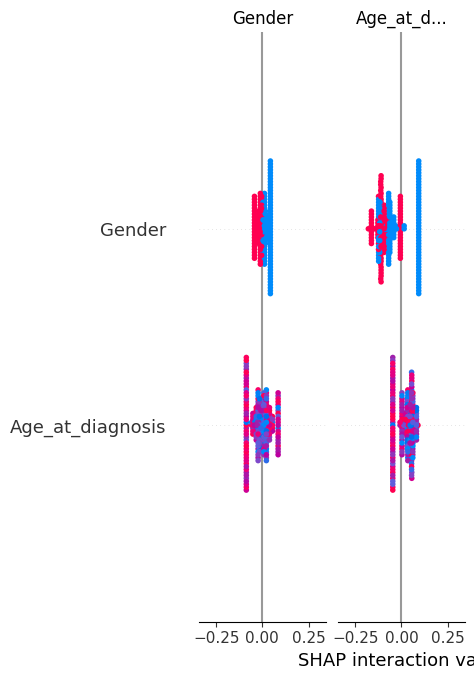

In [28]:
explainer = shap.TreeExplainer(random_forest)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names=FEATURES)

O gráfico acima compara as features correspondentes ao gênero e idade do paciente. As linhas e colunas demonstram interações específicas entre as variáveis (Gender x Gender, Gender x Age_at_diagnosis e Age_at_diagnosis x Age_at_diagnosis). Os pontos correspondentes a `Gender` possuem valores SHAP muito próximos a zero - o que indica que a variável possuí baixo impacto no modelo. Já a variável `Age_at_diagnosis` demonstra uma distribuição um pouco melhor que `Gender` - possuí mais impacto, mas ainda sim, é mínimo. De todo modo, ambas as features não demonstram grande impacto nas previsões do modelo.

### 4.7.2. XGBoostClassifier

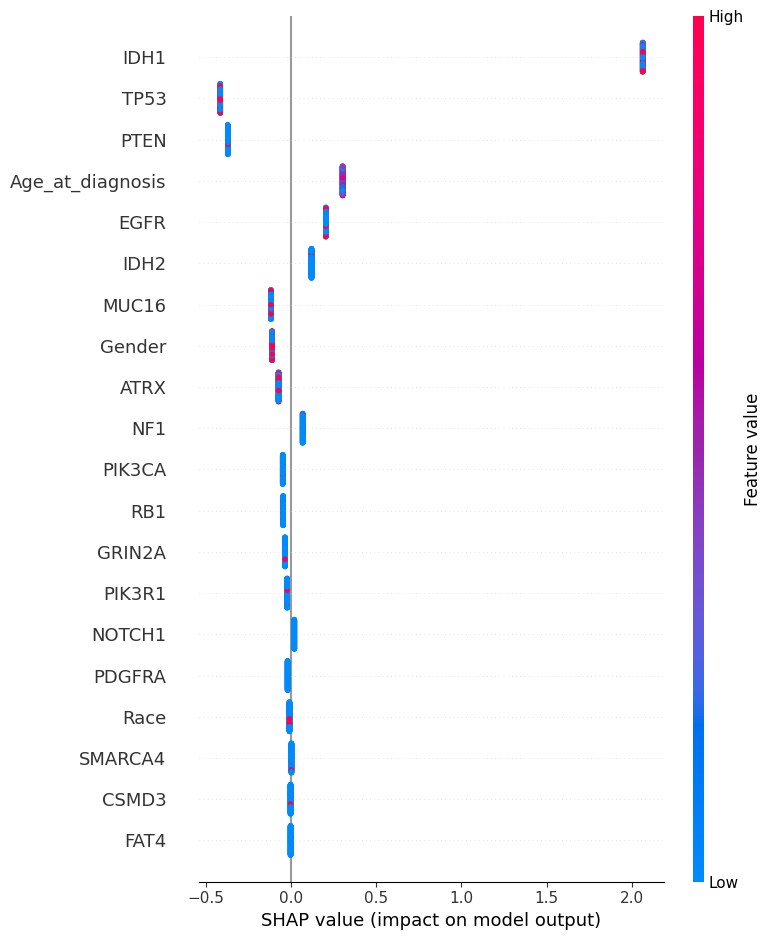

In [29]:
explainer = shap.Explainer(xgboost)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names=FEATURES)

Dado o gráfico acima, é possível perceber que, para o modelo `XGBoostClassifier`, o atríbuto `IDH1` possuí a maior contribuição para a probabilidade da classe alvo. Em outras palavras, a presença da mutação `IDH1` possuí impacto positivo para distinção do câncer. Por outro lado, mutações atreladas ao gene `TP53` e ao gene `PTEN` apresentam impacto negativo para as previsões. Outros atributos como Age_at_diagnosis, EGFR e IDH2 também apresentaram um impacto positivo notável para a classificação.

### 4.7.3. SupportVectorClassification

PermutationExplainer explainer: 253it [04:15,  1.01s/it]                                                               
C:\Users\mariana25021\AppData\Local\Temp\ipykernel_28016\921272174.py:6: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test, feature_names=FEATURES)


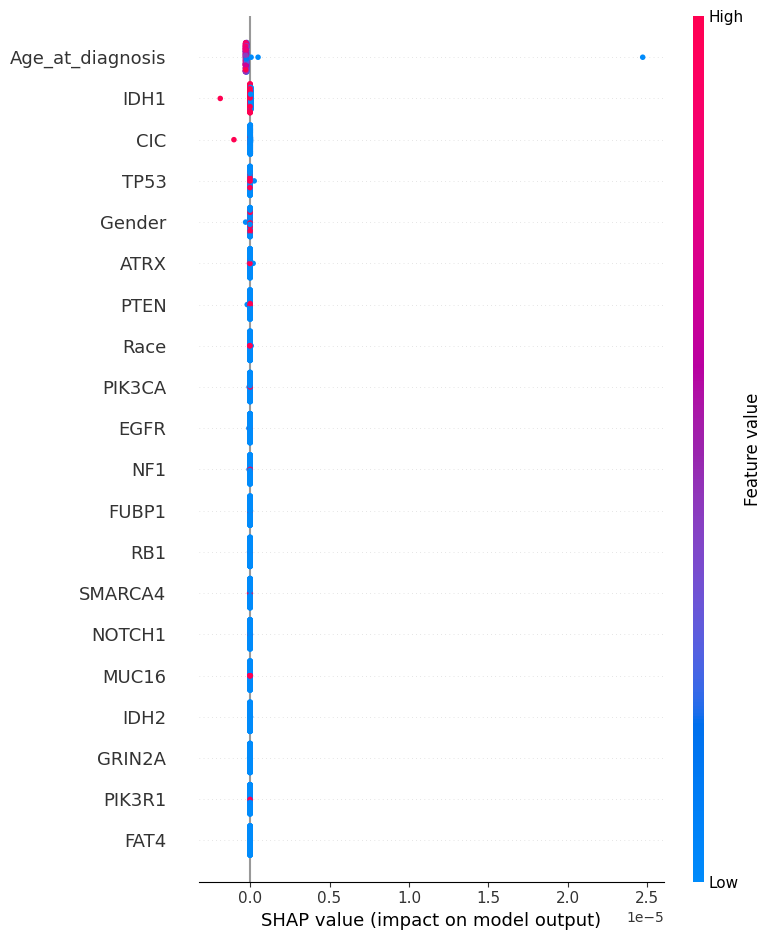

In [30]:
masker = shap.maskers.Independent(X_test)

explainer = shap.Explainer(modelo_svc.decision_function, masker)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test, feature_names=FEATURES)

No caso do SVC, nenhum dos features possui uma contribuição significativa na previsão do modelo, uma vez que os pontos correspondentes a elas encontram-se extremamente próximos de zero. Apenas a feature `Age_at_diagnosis` apresenta alguma variação, mas ainda assim é muito pequena para que seja possível afirmar que ela possua alguma influência significativa para o modelo. 

### 4.7.4. Bernoulli Naivebayes

PermutationExplainer explainer: 253it [00:14,  7.43it/s]                                                               
C:\Users\mariana25021\AppData\Local\Temp\ipykernel_28016\3209963467.py:6: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test, feature_names=FEATURES)
C:\Users\mariana25021\AppData\Roaming\Python\Python312\site-packages\shap\plots\_beeswarm.py:723: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(
C:\Users\mariana25021\AppData\Roaming\Python\Python312\site-packages\shap\plots\_beeswarm.py:743: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In 

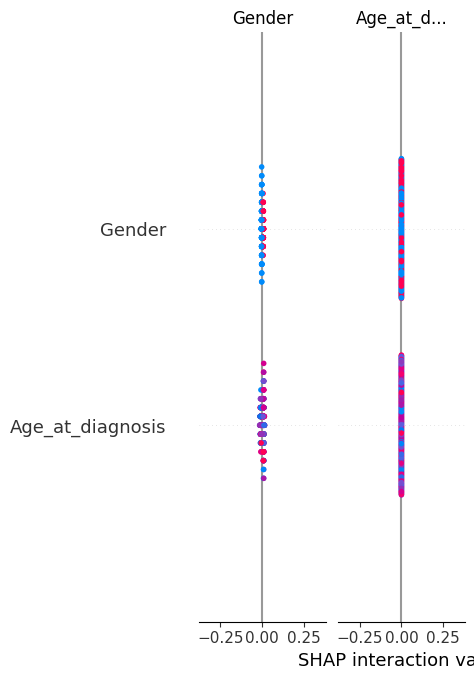

In [31]:
masker = shap.maskers.Independent(X_test)

explainer = shap.Explainer(BNB.predict_proba, masker)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test, feature_names=FEATURES)

De maneira semelhante ao que concluímos do gráfico correspondente as features do algoritmo `RandomForestRegressor`, as features em questão (gênero e idade) encontram-se muito próximas a zero, e portanto, não é possível inferir que elas possuam alguma contribuição significante para as previsões.

### 4.7.5. ExtraTreesClassifier

C:\Users\mariana25021\AppData\Local\Temp\ipykernel_28016\765791593.py:3: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test, feature_names=FEATURES)
C:\Users\mariana25021\AppData\Roaming\Python\Python312\site-packages\shap\plots\_beeswarm.py:723: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(
C:\Users\mariana25021\AppData\Roaming\Python\Python312\site-packages\shap\plots\_beeswarm.py:743: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour an

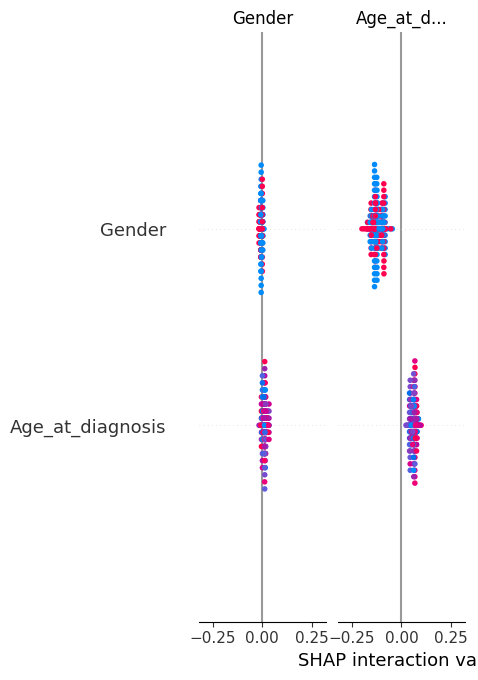

In [32]:
explainer = shap.Explainer(ETC)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names=FEATURES)

Os pontos associados a linha e coluna Gender x Age_at_diagnosis demonstra que a combinação das duas variáveis possuí um impacto negativo para as previsões, mas o mesmo não é muito significativo (maior que -0.25). A maioria dos pontos no gráfico ainda encontra-se perto de zero, o que, novamente, indica que as features em questão podem não ser atributos que contribuam para as previsões. 

Você percebeu que apenas os modelos do XGBoostClassifier e do Support Vector Classification apresentaram gráficos que consideram todos os 23 atributos? Vamos entender o porquê disso?

Quando usamos o SHAP para interpretar modelos, o comportamento do `Explainer` varia conforme o tipo de algoritmo. Modelos como XGBoostClassifier e Support Vector Classification (SVC) exibem todas as features porque o SHAP possui integração nativa com XGBoost (via TreeSHAP) e, para SVC, utiliza KernelSHAP, que calcula contribuições para cada atributo individualmente.

Por outro lado, modelos como RandomForestClassifier, ExtraTreesClassifier e Bernoulli Naive Bayes não mostram todas as features quando usamos `shap.Explainer` de forma genérica. Isso acontece porque:
- Para árvores (RandomForest e ExtraTrees), o SHAP pode não identificar automaticamente o método ideal e, em alguns casos, retorna apenas as variáveis mais impactantes.
- Para Naive Bayes, não existe suporte nativo no SHAP, então o explainer genérico usa aproximações que não detalham todas as features.

Em resumo, a diferença não está nos dados, mas no método de explicação escolhido pelo SHAP. Modelos com integração nativa (XGBoost) ou que usam KernelSHAP (SVC) mostram todas as features, enquanto outros exigem que você especifique o explainer correto para obter resultados completos.

Por isso, que tal tentar outra ferramenta explicativa? Podemos utilizar o LIME...

## 4.8. Uso de ferramentas explicativas: LIME

A ferramenta LIME (Local Interpretable Model-agnostic Explanations) é uma abordagem amplamente utilizada para explicar modelos de aprendizado de máquina, especialmente aqueles considerados “caixas-pretas”, como ensembles, árvores de decisão e classificadores complexos. Diferente do SHAP, que se baseia na teoria dos jogos, o LIME utiliza um método aproximado para explicar localmente uma previsão específica, tornando a interpretação mais acessível.

### Como o LIME funciona?
- O LIME cria um conjunto de dados sintético em torno da instância que queremos explicar, perturbando levemente os valores das features.
- Em seguida, ajusta um modelo linear simples sobre essas amostras para aproximar o comportamento do modelo original naquela região.
- O resultado é uma lista de features com seus pesos, indicando quanto cada atributo contribuiu para a decisão do modelo para aquela instância.

### Por que aplicar o LIME é importante?
- Permite entender por que o modelo tomou uma decisão específica, mesmo quando ele é complexo.
- É útil para auditoria e transparência, pois mostra quais variáveis influenciaram mais em casos críticos.
- Funciona para qualquer tipo de modelo, pois é agnóstico ao algoritmo.

A principal visualização do LIME é um gráfico de barras, onde cada barra representa uma feature e sua contribuição positiva ou negativa para a previsão. Essa explicação é **local**, ou seja, específica para uma instância, tornando o LIME ideal para análises detalhadas de casos individuais.

---

Agora que sabemos mais detalhes sobre a ferramenta LIME, o primeiro passo é instalar o pacote necessário por meio do comando:

In [33]:
!pip install lime

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Com isso, podemos criar uma função que será responsável por mostrar as estatísticas do LIME.

### Função `mostra_lime()`

Essa função foi criada para gerar explicações locais utilizando a ferramenta LIME (Local Interpretable Model-agnostic Explanations). Essa abordagem é especialmente útil para entender por que um modelo tomou uma decisão específica, mesmo quando ele é considerado uma “caixa-preta”, como Random Forest, XGBoost ou outros classificadores complexos.

O objetivo da função é:
- Instanciar um explainer do LIME com os dados de treino, os nomes das features e das classes.
- Selecionar uma instância do conjunto de teste para explicar.
- Gerar uma visualização interativa que mostra quais atributos mais influenciaram a previsão para aquela instância.

Reforçamos que essa explicação é local, ou seja, específica para um único exemplo, permitindo analisar casos críticos ou validar se o modelo está usando informações coerentes.

---

Como funciona passo a passo:
1. Cria o `LimeTabularExplainer` com os dados de treino e metadados (nomes das features e classes).
2. Escolhe uma instância do conjunto de teste (índice `i`, colocando como valor fixo o índice 10).
3. Chama `explain_instance`, passando os valores da instância e a função de predição do modelo (`predict_proba`).
4. Exibe a explicação em um gráfico de barras interativo no notebook, mostrando a contribuição positiva ou negativa de cada feature.

Essa função é ideal para complementar a análise do modelo, trazendo transparência e interpretabilidade.

In [34]:
def mostra_lime(modelo):
    
    explainer = LimeTabularExplainer(
        training_data=X_train_scaled_standard,
        feature_names=FEATURES,
        class_names=['LGG', 'GBM'],
        mode='classification'
    )
    
    i = 10
    exp = explainer.explain_instance(
        data_row=X_test_scaled_standard[i],
        predict_fn=modelo.predict_proba
    )
    
    exp.show_in_notebook(show_table=True)

Vamos analisar a aplicação do LIME em cada um dos modelos?

### 4.8.1. Random Forest Classifier

In [35]:
mostra_lime(random_forest)

O modelo apresentou uma predição com confiança total para LGG (Low-Grade Glioma), atribuindo 100% de probabilidade para essa classe e 0% para GBM (Glioblastoma Multiforme). Essa decisão foi baseada principalmente no valor da mutação IDH1, um marcador fortemente associado a gliomas de baixo grau.  

No gráfico central, vemos as condições que influenciaram a classificação. Para LGG, destacam-se regras como:  
- IDH1 entre -0.96 e 1.05, com maior peso na decisão (0.48).  
- PTEN ≤ -0.46  
- CIC > -0.36  
- RB1 ≤ -0.22  
- EGFR ≤ -0.41  
- PIK3R1 ≤ -0.26  
- FUBP1 > -0.24  

Essas mutações reforçam o padrão típico de LGG.  

Por outro lado, outras condições favorecem GBM, como:  
- IDH2 ≤ -0.18 (peso 0.18)  
- NOTCH1 ≤ -0.23 (peso 0.14)  

Apesar disso, seus efeitos são insuficientes para alterar a classificação, pois os marcadores principais apontam fortemente para LGG.  

Na tabela à direita, os valores das features confirmam essa tendência:  
- IDH1 = 1.05 é determinante para LGG.  
- CIC = 2.81 também reforça essa classe.  
- IDH2 (-0.18) e NOTCH1 (-0.23) indicam alguma proximidade com GBM, mas não têm força suficiente diante do conjunto de mutações favoráveis a LGG.  

Em termos biológicos, isso faz sentido: mutações em IDH1 são características clássicas de gliomas de baixo grau, enquanto GBM tende a apresentar perfis diferentes, com menor frequência dessas alterações. 

### 4.8.2. XGBoost Classifier

In [36]:
mostra_lime(xgboost)

Esse segundo modelo classificou este caso com confiança total para LGG (Low-Grade Glioma), atribuindo 100% de probabilidade para essa classe e 0% para GBM (Glioblastoma Multiforme). A decisão foi fortemente influenciada pelo valor da mutação IDH1, um marcador clássico associado a gliomas de baixo grau.
No gráfico central, as condições que sustentam a predição para LGG incluem:

- IDH1 entre -0.96 e 1.05, com maior peso na decisão (0.62).
- PTEN ≤ -0.46
- RB1 ≤ -0.22
- Idade no diagnóstico > -0.85
- TP53 ≤ -0.86
- GRIN2A ≤ -0.20
- MUC16 ≤ -0.36

Essas mutações e características reforçam o padrão típico de LGG, tanto por alterações genéticas quanto por fatores clínicos.

Por outro lado, algumas condições favorecem GBM, mas com menor impacto:
- IDH2 ≤ -0.18 (peso 0.20)
- NF1 ≤ -0.30 (peso 0.12)
- NOTCH1 ≤ -0.23 (peso 0.08)

Na tabela à direita, os valores das features confirmam essa tendência:
- IDH1 = 1.05 é determinante para LGG.
- TP53 = -0.86 e PTEN = -0.46 também contribuem para essa classificação.
- A idade no diagnóstico (-0.18) sugere um perfil mais jovem, comum em LGG.
- Já IDH2 (-0.18), NF1 (-0.30) e NOTCH1 (-0.23) indicam alguma proximidade com GBM, mas não têm força suficiente diante do conjunto de mutações favoráveis a LGG.

Do ponto de vista biológico, isso é coerente: mutações em IDH1 são características marcantes de gliomas de baixo grau, enquanto GBM tende a apresentar perfis genéticos distintos, com maior frequência de alterações em genes como NF1 e NOTCH1.

### 4.8.3. SupportVector Classification

In [37]:
mostra_lime(modelo_svc)

O modelo SVC classificou este caso como LGG (Low-Grade Glioma) com alta confiança, atribuindo 95% de probabilidade para LGG e 5% para GBM (Glioblastoma Multiforme). Embora a decisão seja clara, a presença de algumas mutações associadas a GBM indica um perfil mais complexo. Entre os fatores que sustentam a classificação para LGG, destacam-se:
- RB1 ≤ -0.22, com maior peso na decisão (0.31).
- IDH1 entre -0.96 e 1.05, outro marcador importante (peso 0.25).
- PDGFRA ≤ -0.16, contribuindo para reforçar LGG (peso 0.20).
- Outras mutações como PTEN (-0.46), GRIN2A (-0.20), PIK3R1 (-0.26) e FUBP1 (-0.24) também aparecem como favoráveis à classe LGG.

Por outro lado, algumas condições indicam características associadas a GBM:
- NOTCH1 ≤ -0.23 (peso 0.16).
- SMARCA4 ≤ -0.17 (peso 0.15).
- IDH2 ≤ -0.18 (peso 0.14).

Na tabela à direita, os valores das features confirmam essa mistura:
- IDH1 = 1.05 e RB1 = -0.22 são determinantes para LGG.
- NOTCH1 (-0.23), SMARCA4 (-0.17) e IDH2 (-0.18) sugerem alguma proximidade com GBM, mas não têm força suficiente para alterar a classificação.
- A presença de PDGFRA (-0.16) e PTEN (-0.46) reforça ainda mais LGG.

Do ponto de vista biológico, isso é coerente: mutações em IDH1 são fortemente associadas a gliomas de baixo grau, enquanto GBM tende a apresentar perfis com alterações em genes como NOTCH1, SMARCA4 e IDH2. A pequena probabilidade atribuída a GBM reflete essas mutações secundárias, mas o conjunto geral favorece LGG.

### 4.8.4. Bernoulli NaiveBayes

In [38]:
mostra_lime(BNB)

O modelo classificou este caso com confiança total para LGG (Low-Grade Glioma), atribuindo 100% de probabilidade para LGG e 0% para GBM (Glioblastoma Multiforme). Apesar da certeza do modelo, algumas mutações associadas a GBM aparecem, indicando características mistas, mas insuficientes para alterar a decisão. Entre os fatores que sustentam a classificação para LGG, destacam-se:
- RB1 ≤ -0.22, com maior peso na decisão (0.35).
- GRIN2A ≤ -0.20 e FUBP1 > -0.24, ambos com peso relevante (0.24 cada).
- Idade no diagnóstico > -0.85 (peso 0.21), sugerindo um perfil mais jovem, típico de LGG.
- PIK3R1 ≤ -0.26 (peso 0.18) e MUC16 ≤ -0.36 (peso 0.11) também reforçam LGG.

Por outro lado, algumas condições indicam características associadas a GBM:
- NOTCH1 ≤ -0.23 (peso 0.28), sendo a mais forte entre as regras para GBM.
- ATRX ≤ -0.63 (peso 0.23), uma mutação relevante para tumores mais agressivos.
- IDH2 ≤ -0.18 (peso 0.17) e SMARCA4 ≤ -0.17 (peso 0.14) também aparecem como sinais secundários.

Na tabela à direita, os valores das features confirmam essa mistura:
- FUBP1 = 4.16 é extremamente elevado, reforçando LGG.
- RB1 (-0.22), GRIN2A (-0.20) e PIK3R1 (-0.26) também favorecem LGG.
- Já NOTCH1 (-0.23), ATRX (-0.63) e SMARCA4 (-0.17) indicam alguma proximidade com GBM, mas não têm força suficiente diante do conjunto geral.

Do ponto de vista biológico, isso é coerente: mutações como FUBP1 e IDH1 (não presente aqui, mas geralmente relevante) são características marcantes de gliomas de baixo grau, enquanto GBM tende a apresentar perfis com alterações em genes como NOTCH1, ATRX e SMARCA4. A presença dessas mutações secundárias explica por que o modelo considera uma pequena influência de GBM, mas a predominância dos marcadores de LGG garante a classificação final.

### 4.8.5. ExtraTreesClassifier

In [39]:
mostra_lime(ETC)

O modelo classificou este caso com confiança total para LGG (Low-Grade Glioma), atribuindo 100% de probabilidade para LGG e 0% para GBM (Glioblastoma Multiforme). A decisão foi fortemente influenciada por mutações características de gliomas de baixo grau. Entre os fatores que sustentam a classificação para LGG, destacam-se:
- IDH1 entre -0.96 e 1.05, com peso relevante (0.18), sendo um marcador clássico de LGG.
- RB1 ≤ -0.22 (peso 0.14), associado à regulação do ciclo celular.
- Outras mutações como EGFR ≤ -0.41, PTEN ≤ -0.46, ATRX ≤ -0.63, CIC > -0.36, PIK3R1 ≤ -0.26 e até a variável clínica Race ≤ -0.29 também reforçam LGG, embora com pesos menores.

Por outro lado, algumas condições indicam características associadas a GBM, mas com impacto reduzido:
- NOTCH1 ≤ -0.23 (peso 0.14).
- IDH2 ≤ -0.18 (peso 0.07).

Na tabela à direita, os valores das features confirmam essa tendência:
- IDH1 = 1.05 é determinante para LGG.
- CIC = 2.81 também reforça fortemente essa classe.
- Já NOTCH1 (-0.23) e IDH2 (-0.18) indicam alguma proximidade com GBM, mas não têm força suficiente diante do conjunto geral.

Do ponto de vista biológico, isso é coerente: mutações em IDH1 e CIC são características marcantes de gliomas de baixo grau, enquanto GBM tende a apresentar perfis com alterações em genes como NOTCH1 e IDH2. A predominância dos marcadores de LGG garante a classificação final com alta confiança.

---
### Uma conclusão geral sobre o LIME

Todas essas visualizações do LIME são apresentadas de forma simples e intuitiva para explicar uma previsão específica do modelo. O resultado é um gráfico de barras, onde cada barra representa uma feature do conjunto de dados. O comprimento da barra indica a intensidade da contribuição dessa feature para a decisão, enquanto a cor mostra se essa influência foi positiva (aumentando a probabilidade da classe prevista) ou negativa (reduzindo essa probabilidade). Ao lado das barras, aparecem os valores reais das features para a instância analisada, permitindo entender o contexto da explicação.

Além do gráfico, o LIME também pode exibir uma tabela complementar, ordenando as features por importância e mostrando seus valores originais e pesos atribuídos. Essa abordagem é local, ou seja, explica apenas uma previsão específica, tornando-a ideal para analisar casos críticos ou validar se o modelo está usando informações coerentes. Essa clareza visual ajuda a transformar modelos complexos em decisões compreensíveis, aumentando a transparência e a confiança no aprendizado de máquina.

# 5. Resultados e Discussões

### 5.1 Desempenho comparativo dos modelos 

Após treinamento, otimização dos hiperparâmetros com a ferramenta `Optuna` e validação cruzada, os cinco modelos foram avaliados juntamento a um modelo baseline para referencial. Comparando os desempenhos, os modelos `CSV` e `BernoulliNB` foram os que apresentaram uma maior acurácia para as previsões. Dentre os dois algoritmos, o `BernoulliNB` demonstrou-se o mais estável, com desvio padrão correspondente a $0.0065$. Ademais, o desempenho do modelo baseline revelou ser inferior ao desempenho dos demais, confirmando a capacidade preditiva das features selecionadas. O resultado prévio a otimização de hiperparâmetros também revela que a previsão dos algoritmos superam as do baseline, o que ressalta a importância da escolha de modelos mais robustos dado o objetivo do trabalho. 

### 5.2 Interpretação com SHAP e LIME

Em linhas gerais, o usa da ferramenta SHAP e LIME revelaram que mutações atreladas aos genes IDH1 e TP53, bem como a idade do paciente, são features determinantes e com grande impacto nas previsões. Esses atributos apresentaram valores SHAP significativamente maiores em relação às demais features, indicando maior contribuição para a saída do algoritmo. Em termos práticos, isso significa que alterações nesses genes e a idade do paciente influenciam fortemente a probabilidade da classe alvo, enquanto variáveis demográficas, como gênero e raça, demonstraram impacto mínimo. 

### 5.3 Discussão integrada

Os resultados confirmam a viabilidade do uso de modelos preditivos supervisionados para realizar a classificação/diagnóstico de gliomas com base nas informações do paciente referentes a dados clínicos e mutacionais, desde que combinados com ferramentas de otimização de hiperparâmetros e explicativas. Tais fatores permitiram atingir uma alta acurácia nas previsões, além de também gerar explicações clinicamente interpretáveis. Conclui-se que, diante dos algoritmos testados, `BernoulliNB` demonstra-se o algoritmo mais estável e simultaneamente mais acurato. 

# 6. Conclusões

O projeto *“Genes & Graus: A Jornada do Trio Epistasia”* surgiu como uma proposta da disciplina de Machine Learning sobre a mentoria do professor Daniel R. Cassar, e busca explorar as aplicações de modelos preditivos supervisionados em cenários tecno-científicos ao passo que agrupa conhecimentos adquiridos ao longo da disciplina, combinando rigor metodológico para a construção de algoritmos eficientes e compreender sua relevância para problemas reais.

Esse trabalho buscou desenvolver modelos preditivos para o dataset *Glioma Grading Clinical and Mutation Features* no intuíto de prever e classificar glioumas do tipo Low-Grade (LGG) e GlioblastaMultiforme (HGG), utilizando uma série de dados que incluiam dados mutacionais e clínicos dos pacientes. A partir da abordagem presente, que incluiu etapas de pré-processamento, instanciação de modelos, otimização e exploração de hiperparâmetros com Optuna, além de validação cruzada para avaliação do desempenho dos algoritmos e uso de ferramentas explicativas como SHAP e LIME, foi possível construir modelos funcionais e interpretar o seu funcionamento. 

Considerando a temática escolhida pelo grupo, é necessário ressaltar a importância de um modelo preditivo eficaz para cenários clínicos, visando auxiliar na estatificação de pacientes e personalização do tratamento, reduzindo a dependência de diagnósticos muito objetivos e, certamente, otimizando esses processos. Tecnicamente falando, reforçamos a necessidade de seguir as etapas mencionadas anteriormente, desde o processo de limpeza dos dados até métodos rigorosos de validação que busquem sempre por uma maior acurácia do modelo.

# Referências Bibliográficas

[1] TASCI, E., CAMPHAUSEN, K., KRAUZE, A., & ZHUGE, Y. (2022). Glioma Grading Clinical and Mutation Features [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5R62J.

[2] SCIKIT-LEARN. StandardScaler. Disponível em: <https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>.

[3] UCI Machine Learning Repository. Disponível em: <https://archive.ics.uci.edu/dataset/759/glioma+grading+clinical+and+mutation+features+dataset>.

[4] SHAFI, A. Classificação de floresta aleatória com o Scikit-Learn. Disponível em: <https://www.datacamp.com/pt/tutorial/random-forests-classifier-python>. Acesso em: 30 out. 2025

[5] BEX TUYCHIEV. Um guia para o algoritmo Gradient Boosting. Disponível em: <https://www.datacamp.com/pt/tutorial/guide-to-the-gradient-boosting-algorithm>. Acesso em: 30 out. 2025.

[6] AWAN, A. A. Uma introdução aos valores SHAP e à interpretabilidade do aprendizado de máquina. Disponível em: <https://www.datacamp.com/pt/tutorial/introduction-to-shap-values-machine-learning-interpretability>. Acesso em: 31 out. 2025.

[7] ERICK FREIRE DEV. O que é uma Instância em Java ? - Erick Freire. Disponível em: <https://www.youtube.com/watch?v=_ye5oGvj-9A>. Acesso em: 3 nov. 2025.

[8] PAUL, S. Hyperparameter Optimization & Tuning for Machine Learning (ML). Disponível em: <https://www.datacamp.com/tutorial/parameter-optimization-machine-learning-models>.

[9] BUNMI AKINREMI. Optuna for Deep Reinforcement Learning in Python. Disponível em: <https://www.datacamp.com/tutorial/optuna>.

[10] Entenda o que é Variância e Viés em Machine Learning. Disponível em: <https://didatica.tech/conceitos-de-variancia-e-de-vies/>. Acesso em: 3 nov. 2025.

[11] Entenda o que é Underfitting e Overfitting (Machine Learning). Disponível em: <https://didatica.tech/underfitting-e-overfitting/>.

[12] SAVIETTO, J. V. Machine Learning: Métricas, Validação Cruzada, Bias e Variância. Disponível em: <https://medium.com/@jvsavietto6/machine-learning-m%C3%A9tricas-valida%C3%A7%C3%A3o-cruzada-bias-e-vari%C3%A2ncia-380513d97c95>.

[13] Entenda o que são Dados de Treino e Teste (Machine Learning). Disponível em: <https://didatica.tech/dados-de-treino-e-teste/>.

[14] LUNDBERG, S.; LEE, S.-I. A Unified Approach to Interpreting Model Predictions. [s.l: s.n.]. Disponível em: <https://proceedings.neurips.cc/paper_files/paper/2017/file/8a20a8621978632d76c43dfd28b67767-Paper.pdf>.

[15] SALIH, A. M. et al. A Perspective on Explainable Artificial Intelligence Methods: SHAP and LIME. Advanced Intelligent Systems, v. 7, n. 1, 27 jun. 2024.

[16] VIMBI, V.; SHAFFI, N.; MAHMUD, M. Interpreting artificial intelligence models: a systematic review on the application of LIME and SHAP in Alzheimer’s disease detection. Brain informatics, v. 11, n. 1, 5 abr. 2024.

[17] NATIONAL CANCER INSTITUTE. The Cancer Genome Atlas Program (TCGA) - NCI. Disponível em: <https://www.cancer.gov/ccg/research/genome-sequencing/tcga>.

[18] VERHAAK, R. G. W. et al. Integrated Genomic Analysis Identifies Clinically Relevant Subtypes of Glioblastoma Characterized by Abnormalities in PDGFRA, IDH1, EGFR, and NF1. Cancer Cell, v. 17, n. 1, p. 98–110, jan. 2010.

‌[19] CANCER GENOME ATLAS RESEARCH NETWORK. Comprehensive, Integrative Genomic Analysis of Diffuse Lower-Grade Gliomas. New England Journal of Medicine, v. 372, n. 26, p. 2481–2498, 25 jun. 2015.

‌[20] PARSONS, D. W. et al. An Integrated Genomic Analysis of Human Glioblastoma Multiforme. Science, v. 321, n. 5897, p. 1807–1812, 26 set. 2008.

‌[21] LOUIS, D. N. et al. The 2016 World Health Organization Classification of Tumors of the Central Nervous System: a Summary. Acta Neuropathologica, v. 131, n. 6, p. 803–820, 9 maio 2016.

[22] IBM. Pipeline de aprendizado de máquina. Disponível em: <https://www.ibm.com/br-pt/think/topics/machine-learning-pipeline>. Acesso em: 3 nov. 2025.

‌[23] DIAZ, M.; PAN, P. C. Management of Low-Grade Gliomas. The Cancer Journal, v. 31, n. 1, 1 jan. 2025.

[24] ABIKENARI, M. et al. Revisiting glioblastoma classification through an immunological lens: A narrative review. Glioma, v. 7, n. 2, p. 3–9, abr. 2024.

[25] Baldi P. Deep Learning in Biomedical Data Science. Annu Rev Biomed Data Sci. 2018;1:181-205

[26] Manepalli S, Varghese J, Madslhusdhan A, Umamahesh G, Penubaka KK. AI and ML in Biomedical Research: Unlocking Precision Medicine and Accelerating Discoveries. J Neonatal Surg. 2025;14:2940.

# Uso de Inteligência Artificial

Os modelos ChatGPT e DeepSeek foram utilizados especificamente para criar a história inicial no estilo RPG, realizar melhorias pontuais no código e revisar os textos de desenvolvimento do notebook, ajudando a detalhar o passo a passo seguido para guiar melhor o leitor. As perguntas realizadas à IA foram no estilo: *"Escrevi o seguinte texto: ... Como posso melhorá-lo para guiar o leitor passo a passo, mostrando de maneira clara minha resolução?"*.